# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 21:42:30.245034: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T21:42:33.578804
2025-04-14 21:42:33.578804


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 6
MODEL_TO_USE = 1

# COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close %'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 280
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 21:42:27"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

IBOVESPA - Close  IBOVESPA - High  IBOVESPA - Low  IBOVESPA - Open  \
0          0.000000         0.000000        0.000000         0.000000   
1          0.000150         0.000150        0.000049         0.000034   
2          0.000299         0.000406        0.000200         0.000183   
3          0.000468         0.000484        0.000350         0.000333   
4          0.000703         0.000704        0.000519         0.000502   

   Dólar - Close  Dólar - High  Dólar - Low  Dólar - Open  Dow Jones - Close  \
0            0.0           0.0          0.0           0.0           0.003941   
1            0.0           0.0          0.0           0.0           0.004600   
2            0.0           0.0          0.0           0.0           0.004961   
3            0.0           0.0          0.0           0.0           0.005083   
4            0.0           0.0          0.0           0.0           0.005490   

   Dow Jones - High  ...  IBOVESPA - Spread %  Kospi - Spread %  \
0          0.003148  ...             0.000000               0.0   
1          0.003605  ...             0.036606               0.0   
2          0.003965  ...             0.020442               0.0   
3          0.004311  ...             0.008583               0.0   
4          0.004630  ...             0.015204               0.0   

   Minério de Ferro - Spread %  Nasdaq - Spread %  Nikkei - Spread %  \
0                          0.0           0.000000           0.000000   
1                          0.0           0.029525           0.000000   
2                          0.0           0.119266           0.201590   
3                          0.0           0.056198           0.049836   
4                          0.0           0.182793           0.129181   

   Petróleo Brent - Spread %  Petróleo WTI - Spread %  S&P 500 - Spread %  \
0                        0.0                      0.0            0.000000   
1                        0.0                      0.0            0.084905   
2                        0.0                      0.0            0.065165   
3                        0.0                      0.0            0.095393   
4                        0.0                      0.0            0.162195   

   STOXX 600 - Spread %  Shanghai SE - Spread %  
0                   0.0                     0.0  
1                   0.0                     0.0  
2                   0.0                     0.0  
3                   0.0                     0.0  
4                   0.0                     0.0  

[5 rows x 200 columns]

Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

IPCA %                        -0.104904
INPC %                        -0.104528
IBOVESPA - Spread             -0.090141
Nasdaq - Spread %             -0.083494
FTSE 100 - Spread             -0.077431
CAC 40 - Spread               -0.075797
Taxa acumulada no período %   -0.072398
STOXX 600 - Spread            -0.070673
FTSE MIB - Spread             -0.070577
STOXX 600 - Spread %          -0.070486
CAC 40 - Spread %             -0.069626
FTSE MIB - Spread %           -0.067484
Dow Jones - Spread            -0.067139
S&P 500 - Spread %            -0.065647
S&P 500 - Spread              -0.065500
DAX - Spread                  -0.061319
Dólar - Spread                -0.056498
Nasdaq - Spread               -0.055014
FTSE 100 - Spread %           -0.054914
Petróleo WTI - Spread         -0.054419
Kospi - Spread %              -0.054199
Shanghai SE - Open %          -0.053242
Petróleo WTI - Spread %       -0.052938
PIB %                         -0.052670
Dow Jones - Spread %          -0.050204


In [11]:
corr.index

Index(['IPCA %', 'INPC %', 'IBOVESPA - Spread', 'Nasdaq - Spread %',
       'FTSE 100 - Spread', 'CAC 40 - Spread', 'Taxa acumulada no período %',
       'STOXX 600 - Spread', 'FTSE MIB - Spread', 'STOXX 600 - Spread %',
       ...
       'S&P 500 - Low %', 'DAX - Close %', 'CAC 40 - Close %',
       'FTSE 100 - Close %', 'Nasdaq - Close %', 'Dow Jones - Close %',
       'S&P 500 - Close %', 'IBOVESPA - Low %', 'IBOVESPA - High %',
       'IBOVESPA - Close %'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

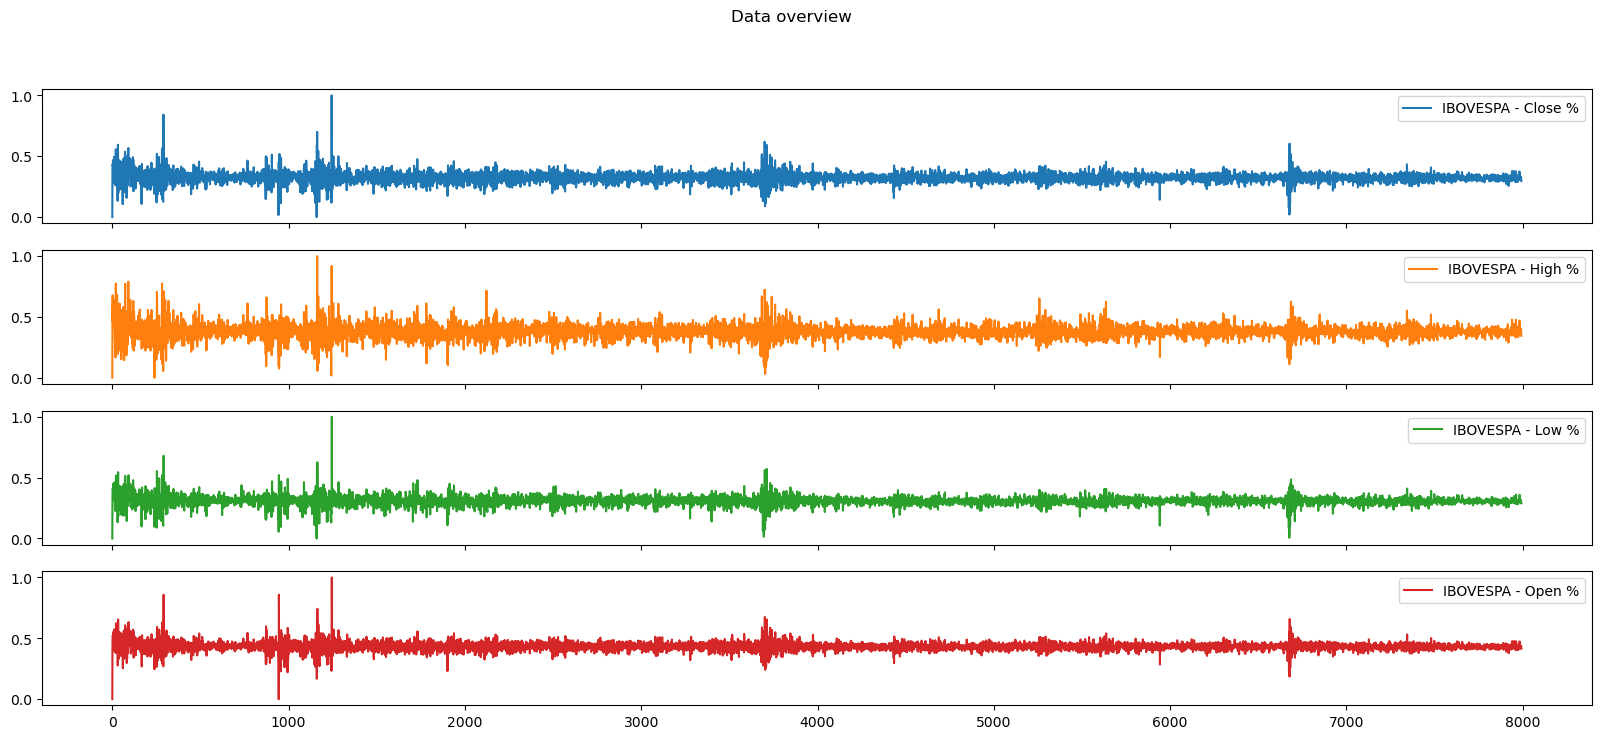

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

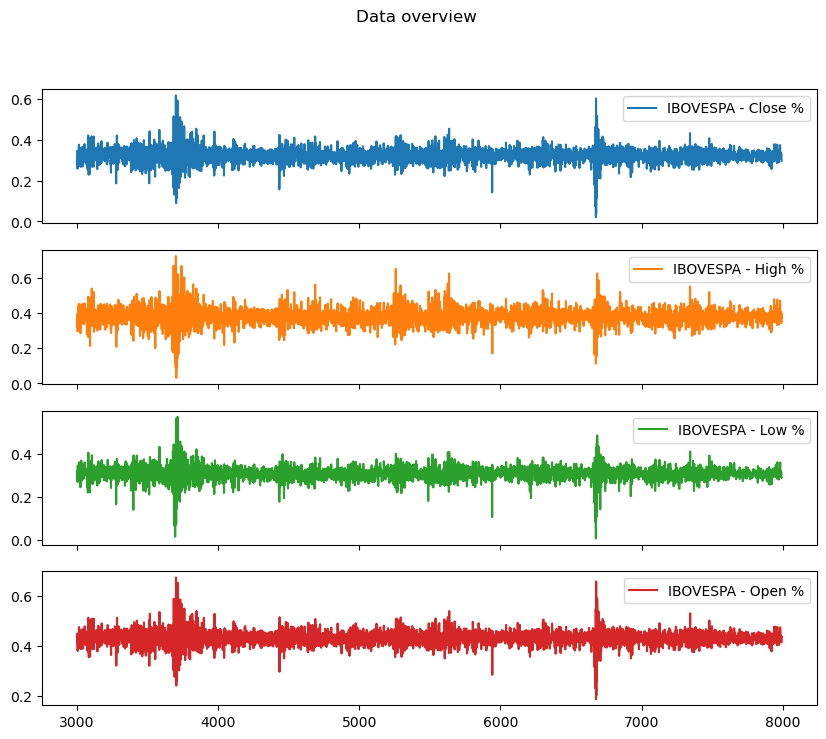

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

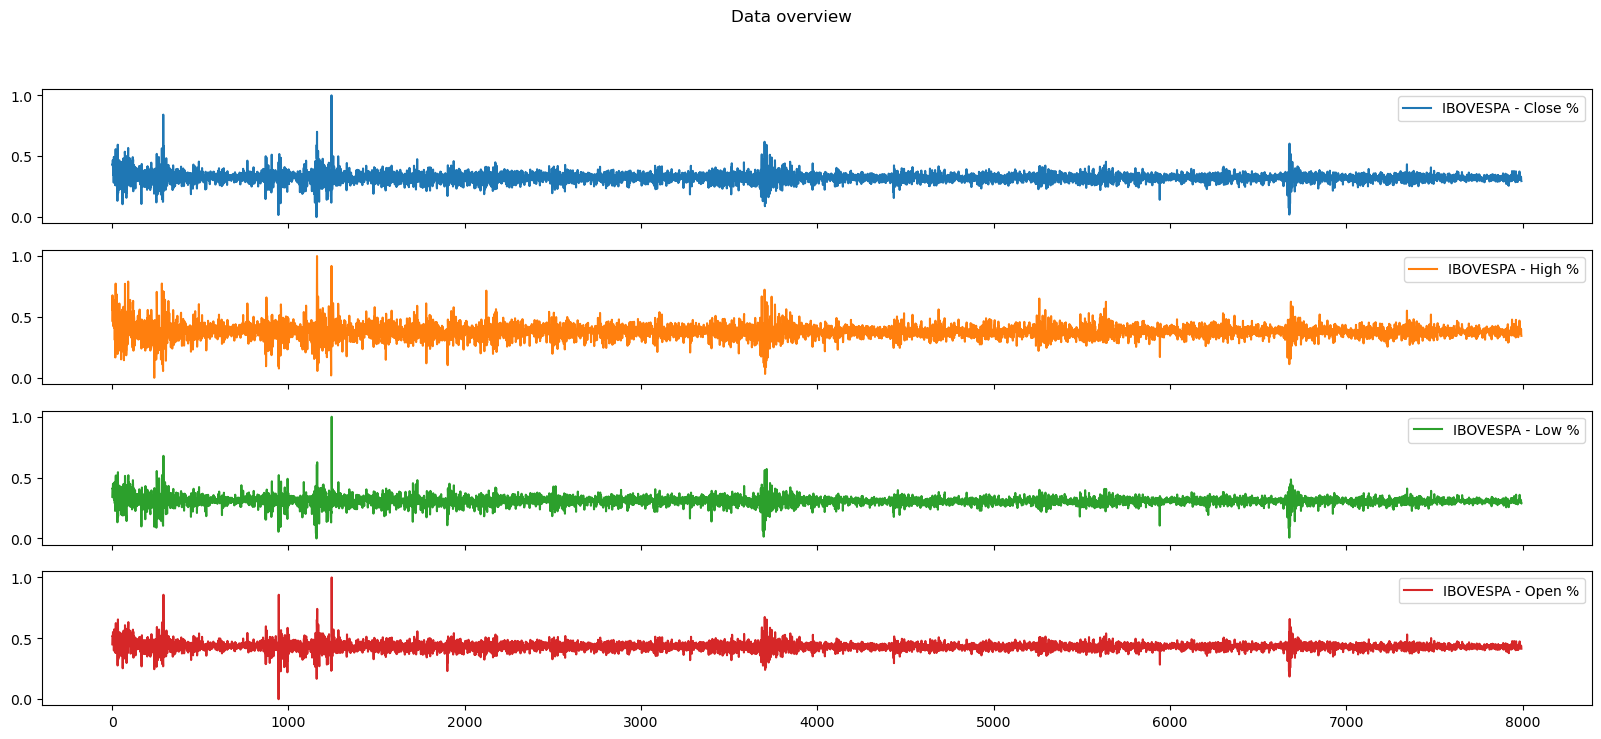

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close %']

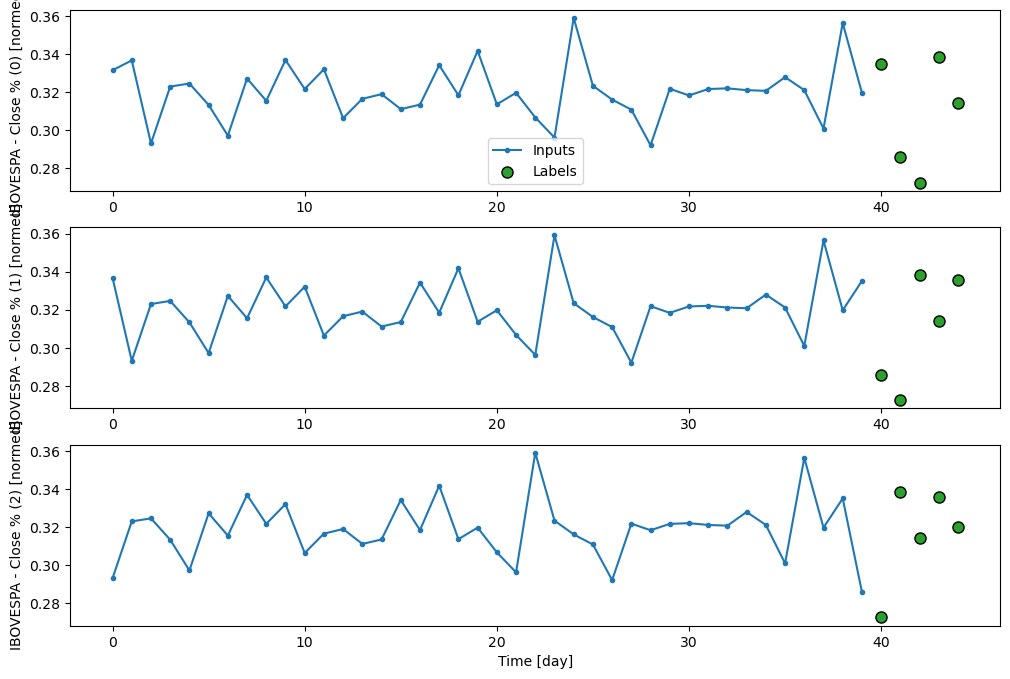

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 4), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

4

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10:38 3s/step - loss: 0.3400 - mean_absolute_error: 0.3400 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 0.1252 - root_mean_squared_error: 0.3539

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.3062 - mean_absolute_error: 0.3062 - mean_absolute_percentage_error: 88.4747 - mean_squared_error: 0.1060 - root_mean_squared_error: 0.3246  

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.2737 - mean_absolute_error: 0.2737 - mean_absolute_percentage_error: 80.2796 - mean_squared_error: 0.0899 - root_mean_squared_error: 0.2975

 10/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.2472 - mean_absolute_error: 0.2472 - mean_absolute_percentage_error: 72.7208 - mean_squared_error: 0.0785 - root_mean_squared_error: 0.2764

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.2254 - mean_absolute_error: 0.2254 - mean_absolute_percentage_error: 66.4863 - mean_squared_error: 0.0695 - root_mean_squared_error: 0.2587

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.2078 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 61.4403 - mean_squared_error: 0.0626 - root_mean_squared_error: 0.2440

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1934 - mean_absolute_error: 0.1934 - mean_absolute_percentage_error: 57.2641 - mean_squared_error: 0.0570 - root_mean_squared_error: 0.2316

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1812 - mean_absolute_error: 0.1812 - mean_absolute_percentage_error: 53.7496 - mean_squared_error: 0.0525 - root_mean_squared_error: 0.2210

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1709 - mean_absolute_error: 0.1709 - mean_absolute_percentage_error: 50.7418 - mean_squared_error: 0.0487 - root_mean_squared_error: 0.2118

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1622 - mean_absolute_error: 0.1622 - mean_absolute_percentage_error: 48.2071 - mean_squared_error: 0.0455 - root_mean_squared_error: 0.2039

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1548 - mean_absolute_error: 0.1548 - mean_absolute_percentage_error: 46.3106 - mean_squared_error: 0.0428 - root_mean_squared_error: 0.1971

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1464 - mean_absolute_error: 0.1464 - mean_absolute_percentage_error: 7588.8696 - mean_squared_error: 0.0398 - root_mean_squared_error: 0.1891

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1413 - mean_absolute_error: 0.1413 - mean_absolute_percentage_error: 26721.9414 - mean_squared_error: 0.0379 - root_mean_squared_error: 0.1841

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1367 - mean_absolute_error: 0.1367 - mean_absolute_percentage_error: 41682.3320 - mean_squared_error: 0.0362 - root_mean_squared_error: 0.1797

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1326 - mean_absolute_error: 0.1326 - mean_absolute_percentage_error: 53502.1992 - mean_squared_error: 0.0348 - root_mean_squared_error: 0.1756

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1276 - mean_absolute_error: 0.1276 - mean_absolute_percentage_error: 65618.5703 - mean_squared_error: 0.0330 - root_mean_squared_error: 0.1706

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1243 - mean_absolute_error: 0.1243 - mean_absolute_percentage_error: 72636.2344 - mean_squared_error: 0.0318 - root_mean_squared_error: 0.1671

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1211 - mean_absolute_error: 0.1211 - mean_absolute_percentage_error: 78292.4062 - mean_squared_error: 0.0307 - root_mean_squared_error: 0.1639

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1182 - mean_absolute_error: 0.1182 - mean_absolute_percentage_error: 82861.1328 - mean_squared_error: 0.0297 - root_mean_squared_error: 0.1609

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1155 - mean_absolute_error: 0.1155 - mean_absolute_percentage_error: 86553.1172 - mean_squared_error: 0.0287 - root_mean_squared_error: 0.1581

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1122 - mean_absolute_error: 0.1122 - mean_absolute_percentage_error: 90390.1094 - mean_squared_error: 0.0276 - root_mean_squared_error: 0.1546

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1100 - mean_absolute_error: 0.1100 - mean_absolute_percentage_error: 92614.8828 - mean_squared_error: 0.0268 - root_mean_squared_error: 0.1521

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1078 - mean_absolute_error: 0.1078 - mean_absolute_percentage_error: 94387.8984 - mean_squared_error: 0.0261 - root_mean_squared_error: 0.1498

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1058 - mean_absolute_error: 0.1058 - mean_absolute_percentage_error: 95785.7031 - mean_squared_error: 0.0254 - root_mean_squared_error: 0.1476

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1039 - mean_absolute_error: 0.1039 - mean_absolute_percentage_error: 96870.3828 - mean_squared_error: 0.0247 - root_mean_squared_error: 0.1455

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1021 - mean_absolute_error: 0.1021 - mean_absolute_percentage_error: 97692.6250 - mean_squared_error: 0.0241 - root_mean_squared_error: 0.1435

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1003 - mean_absolute_error: 0.1003 - mean_absolute_percentage_error: 98294.0781 - mean_squared_error: 0.0235 - root_mean_squared_error: 0.1416

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0987 - mean_absolute_error: 0.0987 - mean_absolute_percentage_error: 98709.1953 - mean_squared_error: 0.0230 - root_mean_squared_error: 0.1398

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0966 - mean_absolute_error: 0.0966 - mean_absolute_percentage_error: 99021.6406 - mean_squared_error: 0.0223 - root_mean_squared_error: 0.1375

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0952 - mean_absolute_error: 0.0952 - mean_absolute_percentage_error: 99105.3594 - mean_squared_error: 0.0218 - root_mean_squared_error: 0.1358

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0938 - mean_absolute_error: 0.0938 - mean_absolute_percentage_error: 99081.3984 - mean_squared_error: 0.0214 - root_mean_squared_error: 0.1343

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0925 - mean_absolute_error: 0.0925 - mean_absolute_percentage_error: 98965.7891 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1327

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0912 - mean_absolute_error: 0.0912 - mean_absolute_percentage_error: 98772.1172 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1313

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0900 - mean_absolute_error: 0.0900 - mean_absolute_percentage_error: 98511.9531 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1299

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0888 - mean_absolute_error: 0.0888 - mean_absolute_percentage_error: 98195.1484 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1285

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0877 - mean_absolute_error: 0.0877 - mean_absolute_percentage_error: 97830.1562 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1272

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0866 - mean_absolute_error: 0.0866 - mean_absolute_percentage_error: 97424.2422 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1260

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0856 - mean_absolute_error: 0.0856 - mean_absolute_percentage_error: 96983.6406 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1248

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0847 - mean_absolute_error: 0.0847 - mean_absolute_percentage_error: 96513.7344 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1236

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 96019.1797 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1225

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0829 - mean_absolute_error: 0.0829 - mean_absolute_percentage_error: 95504.0000 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1215

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0820 - mean_absolute_error: 0.0820 - mean_absolute_percentage_error: 94971.6953 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1204

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0812 - mean_absolute_error: 0.0812 - mean_absolute_percentage_error: 94425.2969 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1194

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0803 - mean_absolute_error: 0.0803 - mean_absolute_percentage_error: 93867.4609 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1185

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0795 - mean_absolute_error: 0.0795 - mean_absolute_percentage_error: 93300.4766 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1175

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0788 - mean_absolute_error: 0.0788 - mean_absolute_percentage_error: 92726.3516 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1166

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 92146.8438 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1157

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0773 - mean_absolute_error: 0.0773 - mean_absolute_percentage_error: 91563.4766 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1148

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0766 - mean_absolute_error: 0.0766 - mean_absolute_percentage_error: 90977.5859 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1140

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0760 - mean_absolute_error: 0.0760 - mean_absolute_percentage_error: 90390.3203 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1131

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 89802.7109 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1123

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 89215.6328 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1115

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0740 - mean_absolute_error: 0.0740 - mean_absolute_percentage_error: 88629.8672 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1108

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0734 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 88046.0781 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1100

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 87464.8594 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1093

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 86886.7031 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1086

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 86312.0547 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1079

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 85741.2969 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1072

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 84986.8828 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1063

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 84426.3750 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1057

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 83870.6641 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1050

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 83502.9453 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1046

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 82955.6328 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1040

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 82413.5469 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1034

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 81876.8125 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1028

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 81345.5156 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1023

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 80819.7188 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1017

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 80299.4922 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1011

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 79784.8672 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1006

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 79275.8672 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1001

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 78772.5000 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.0996

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 78274.7734 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.0991

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0644 - mean_absolute_error: 0.0644 - mean_absolute_percentage_error: 77782.6719 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.0986

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 77296.1797 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.0981

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - mean_absolute_percentage_error: 76815.2812 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.0976

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 76339.9297 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.0971

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 75870.1016 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0967

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 75405.7578 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0962

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 75101.0234 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0959 - val_loss: 0.0138 - val_mean_absolute_error: 0.0138 - val_mean_absolute_percentage_error: 4.2289 - val_mean_squared_error: 2.9925e-04 - val_root_mean_squared_error: 0.0173 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.0844 - mean_absolute_error: 0.0844 - mean_absolute_percentage_error: 28.3716 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.1015

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0806 - mean_absolute_error: 0.0806 - mean_absolute_percentage_error: 25.1196 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0989 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0738 - mean_absolute_error: 0.0738 - mean_absolute_percentage_error: 23.1786 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0919

 10/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 23.2645 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0915

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 22.6093 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0893

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 21.7995 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0867

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 20.9691 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0841

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 20.1690 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0816

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 19.4390 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0793

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 18.8480 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0774

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 18.5995 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0760

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 18.3585 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0747

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 23850.2500 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0740

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 42410.0977 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0736

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 57027.1211 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0732

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 68641.5547 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0728

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 77933.6562 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 85405.2188 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 91432.8281 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 94793.6094 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 97709.5547 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 101373.0781 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0702

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 104323.1406 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 106686.3047 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 71/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 108563.7891 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 74/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 110037.2188 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 77/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 111172.9375 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 112025.2422 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 112638.8438 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 113050.7891 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 113291.9375 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 113388.1328 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 113361.0859 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 113229.1484 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 113007.8672 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 112710.4688 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 112348.2578 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 111930.8984 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 111466.6875 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0634

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 110962.7734 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 110425.3203 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 109859.6484 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0627

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 109270.3672 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 108661.4844 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 108036.4688 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 107398.3438 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 106749.7500 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 106092.9844 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 105430.0469 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 104762.6797 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 104092.4219 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 103644.6328 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 102972.4141 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 102300.4766 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 101629.7578 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 100961.0469 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 100295.0547 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 99632.3828 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591 

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 98973.5703 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 98319.0547 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 97669.2422 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 97024.4609 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 96384.9922 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 95751.0938 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 95122.9609 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 94500.7578 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 93884.6328 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 93274.6875 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 92671.0234 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 92073.7031 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0568

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 91482.7734 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 90898.2812 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 90320.2266 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 89748.6172 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 89183.4531 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 88624.7188 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 88072.3828 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 87526.4141 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 86986.7734 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 86453.4141 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 85928.3750 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551 - val_loss: 0.0135 - val_mean_absolute_error: 0.0135 - val_mean_absolute_percentage_error: 4.1329 - val_mean_squared_error: 2.8558e-04 - val_root_mean_squared_error: 0.0169 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0843 - mean_absolute_error: 0.0843 - mean_absolute_percentage_error: 28.3721 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.1013

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0800 - mean_absolute_error: 0.0800 - mean_absolute_percentage_error: 25.0629 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0981 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 23.1339 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0911

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 23.2058 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0908

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 22.5470 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0886

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 21.7360 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0861

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 20.9077 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0835

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 20.1103 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0810

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 19.3797 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0787

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 18.7933 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0769

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 18.5612 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0755

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 18.3296 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0743

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 23448.0977 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0735

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 41694.7773 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0732

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 56065.1602 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0728

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 67483.6172 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 76618.9219 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 83964.4219 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 89890.3203 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 94678.6719 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 98547.2109 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 101666.0469 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 104169.5156 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 106164.7109 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 107737.7734 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 108958.5391 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 109884.0312 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 110561.1094 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 111028.5391 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 111318.5469 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 111458.0625 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 111469.6953 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 111372.5312 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 111182.7109 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 110913.9531 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 110577.9609 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 110184.7422 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0635

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 109742.8750 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 109259.7578 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 108741.7422 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 108194.3203 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 107622.2500 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 107029.6562 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 106420.1094 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 105796.7422 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 105162.2578 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 104519.0156 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 103869.0781 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 103214.2422 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 102556.0859 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 101895.9688 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 101235.0938 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 100574.4922 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 99915.0859 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593 

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 99257.6562 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 98602.8984 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 97951.4141 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 97303.7109 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 96660.2422 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 96021.3906 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 95387.4844 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 94758.8125 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 94135.6016 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 93518.0625 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 92906.3594 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 92300.6328 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 91700.9766 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 91107.5000 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 90520.2578 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 89939.2969 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 89364.6641 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 88796.3672 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 88234.4062 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 87678.7734 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 87129.4609 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 86586.4453 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 86049.6875 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 85519.1562 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 84994.7969 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 84478.6094 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547 - val_loss: 0.0131 - val_mean_absolute_error: 0.0131 - val_mean_absolute_percentage_error: 4.0380 - val_mean_squared_error: 2.6985e-04 - val_root_mean_squared_error: 0.0164 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 28.4428 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1006

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0793 - mean_absolute_error: 0.0793 - mean_absolute_percentage_error: 25.0459 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0971 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0726 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 23.0909 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0902

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 23.1369 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0900

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0688 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 22.4696 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0879

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 21.6559 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0854

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 20.8276 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0829

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 20.0346 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0804

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 19.3103 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0782

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 18.7295 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0764

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 18.5153 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0751

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 18.2968 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0739

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 22210.0312 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0731

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 39492.5508 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0728

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 53103.5977 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 63918.6992 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 72571.2891 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 79528.6406 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 85141.4141 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 89676.7344 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 93340.8516 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 96294.8828 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 98666.0625 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 100555.8281 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 102045.7656 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 103202.0234 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 104078.6016 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 104719.9062 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 105162.6250 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 105437.3047 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 105569.4375 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 105580.4531 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 105488.4219 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 105308.6250 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 105054.0625 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 104735.8203 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 104363.3672 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 103944.8516 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 103487.2578 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 102996.6094 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 102478.1094 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 101936.2656 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 101374.9766 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 100797.6406 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 100405.3047 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 99807.5859 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612 

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 99200.8594 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 98587.1797 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 97968.3125 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 97345.8281 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 96721.0703 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 96095.2344 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 95469.3438 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 94844.3125 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 94220.9141 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 93599.8438 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 92981.6875 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 92366.9609 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 91756.1094 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 91149.5156 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 90547.5078 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 89950.3750 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 89358.3438 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 88771.6250 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 88190.3828 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 87614.7578 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 87044.8594 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 86480.7812 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 85922.5938 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 85370.3359 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 84824.0703 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 84283.7969 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 83749.5234 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 83221.2500 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 82698.9766 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 82182.6641 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 81672.2891 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 81167.8281 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 80669.2344 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 80015.4141 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546 - val_loss: 0.0129 - val_mean_absolute_error: 0.0129 - val_mean_absolute_percentage_error: 3.9795 - val_mean_squared_error: 2.6124e-04 - val_root_mean_squared_error: 0.0162 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 28.4226 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1005

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0791 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 25.0267 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0969 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 23.0986 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0899

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 23.1579 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0898

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 22.4941 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0877

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 21.6809 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0852

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 20.8511 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0827

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 20.0582 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0803

 25/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 19.3341 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0781

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 18.7528 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0762

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 18.5416 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0750

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 18.3270 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0738

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 22191.3652 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0731

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 39459.3242 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0728

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 53058.9062 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 63864.8984 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 72510.2031 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 79461.6875 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 85069.7344 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 89601.2422 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 93262.2734 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 97062.7734 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 99261.4453 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 71/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 101008.2422 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 102379.1016 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 103435.7656 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 104228.7344 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 104799.6094 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 105182.8750 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 105407.2344 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 105496.7188 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 105471.5469 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 105348.7812 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 105142.8906 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 104866.1953 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 104529.1797 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 104140.8672 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 103708.9531 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 103240.1094 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 102740.0625 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 102213.7500 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 101665.4766 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 101098.9688 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 100517.4453 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 99923.7344 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614 

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 99320.2734 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 98709.2188 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 98092.4141 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 97471.5000 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 96847.8828 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 96222.8125 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 95597.3594 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 94972.4766 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 94348.9766 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 93727.5859 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 93108.9141 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 92493.5078 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 91881.8359 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 91274.2969 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 90671.2344 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 90072.9531 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 89479.6953 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 88891.6797 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 88309.0859 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 87732.0625 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 87160.7266 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 86595.1719 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 86035.4844 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 85481.7188 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 84933.9062 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 84392.0938 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 83856.2734 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 83326.4453 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 82802.6172 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 82284.7500 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 81772.8359 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 81266.8359 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 80766.7109 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 80272.4141 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 79948.0312 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547 - val_loss: 0.0129 - val_mean_absolute_error: 0.0129 - val_mean_absolute_percentage_error: 3.9628 - val_mean_squared_error: 2.5996e-04 - val_root_mean_squared_error: 0.0161 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0839 - mean_absolute_error: 0.0839 - mean_absolute_percentage_error: 28.4010 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1006

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0788 - mean_absolute_error: 0.0788 - mean_absolute_percentage_error: 25.0041 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0964 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 23.2259 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0897

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 23.4137 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0898

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 22.7935 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0878

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 21.9905 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0853

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 21.1588 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0828

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 20.3635 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0804

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 19.6334 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0782

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 19.0416 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0764

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 18.8159 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0751

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 18.5901 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0739

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 22611.8945 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0732

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 40207.1523 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 54064.4961 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 65075.3047 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0722

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 73884.4688 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 80967.7188 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 86682.0625 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 91299.4609 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 95029.8828 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 98037.3672 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 100451.4609 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 102375.4219 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 103892.3281 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 105069.5078 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 105961.9531 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 106614.8594 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 107065.5938 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 107345.2422 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 107479.7734 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 107490.9844 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 107397.2812 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 107214.2344 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 106955.0625 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 106631.0547 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 106251.8750 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 105825.7812 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 105519.2109 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 105030.2734 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 104511.3047 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 103967.1016 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 103401.8438 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 102621.6016 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 102020.4766 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 101408.6406 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 100788.3516 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 100161.6172 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 99530.1562 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607 

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 98895.4922 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 98258.9375 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 97621.6484 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 96984.6250 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 96348.7578 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 95714.7969 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 95083.4062 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 94455.1719 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 93830.5938 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 93210.0859 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 92594.0391 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 91982.7656 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 91376.5312 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 90775.5703 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 90180.0703 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 89590.2031 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 89006.0938 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 88427.8438 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 87855.5547 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0568

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 87289.2656 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 86729.0469 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 86174.9297 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 85626.9141 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 85085.0078 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 84549.2109 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 84019.5078 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 83495.8750 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 82978.2812 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 82466.6797 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 81961.0391 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 81463.2812 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 3.8667 - val_mean_squared_error: 2.4670e-04 - val_root_mean_squared_error: 0.0157 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 28.4189 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1003

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0786 - mean_absolute_error: 0.0786 - mean_absolute_percentage_error: 24.9908 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0961 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 23.1699 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0893

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 23.3289 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0893

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 22.6999 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0873

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 21.8956 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0849

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 21.0654 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0825

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 20.2732 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0801

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 19.5462 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0779

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 18.9566 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0761

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 18.7295 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0748

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 18.5023 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0736

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 22791.6328 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 40526.9375 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 54494.5742 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 65593.0156 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 74472.3047 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 81611.9375 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 87371.7656 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 92025.9219 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 95786.0391 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 98817.4688 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 101250.7734 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 103190.0625 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 104719.0391 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 105905.5938 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 106805.1484 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 107463.2500 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 107917.5859 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 108199.4609 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 108335.0625 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 108346.3672 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 108251.9219 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 108067.4141 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 107806.1875 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 107479.6094 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 107097.3984 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 106667.9141 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 106198.3281 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 105694.8281 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 105162.7422 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 104606.7031 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 104030.7031 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 103438.2422 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 102832.3359 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 102215.6250 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 101590.4062 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 100958.6797 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 100322.1953 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 99682.4766 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603 

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 99040.8594 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 98398.5000 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 97756.4062 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 97115.4766 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 96476.4688 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 95840.0547 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 95206.8203 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 94577.2656 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 93951.8281 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 93330.8750 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 92714.7344 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 92103.6719 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 91497.9297 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 90897.6953 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 90698.8672 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 90500.6797 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 90106.2266 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 89519.4297 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 89131.5234 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 88746.2891 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 88363.7344 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 87983.8828 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 87794.9766 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 87419.2109 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 87046.1719 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 86491.7422 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 85943.4688 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 85401.3594 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 85043.3672 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 84688.1016 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 84335.5547 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 83811.8125 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 83294.1328 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 82782.4766 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 82277.4062 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 82111.5312 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548 - val_loss: 0.0128 - val_mean_absolute_error: 0.0128 - val_mean_absolute_percentage_error: 3.9307 - val_mean_squared_error: 2.5576e-04 - val_root_mean_squared_error: 0.0160 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 28.4039 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1005

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0791 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 25.0294 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0967 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0738 - mean_absolute_error: 0.0738 - mean_absolute_percentage_error: 23.4053 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0913

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 23.3287 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0902

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0697 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 22.8529 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0886

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 22.0750 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0862

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 21.2373 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0836

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 20.4375 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0812

 24/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 19.6821 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0789

 27/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 19.0404 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0769

 30/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 18.7052 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0754

 33/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 18.4726 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0742

 35/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 8302.4570 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0735

 38/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 29311.8906 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 45739.5859 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 58718.8672 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 69057.7734 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 74780.9688 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0716

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 79730.2109 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 85941.5000 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 90958.7266 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 95013.2188 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 97271.9688 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 99227.1016 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 101670.5000 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 69/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 103018.2812 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 71/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 104171.7266 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 105153.1484 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 106344.6250 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 107247.9062 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 107908.7500 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 108233.5703 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 108571.1797 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 108753.6641 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0659

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 108804.3984 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 108774.8828 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 108700.6953 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 108515.4219 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 108348.3672 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 108041.1406 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 107674.9766 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 107402.5312 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 106957.0938 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 106473.5625 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 106133.0000 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 105779.6953 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 105228.8906 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 104656.7734 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 104265.3594 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 103665.6172 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 103462.7812 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 103053.3125 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 102846.8594 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 102430.9531 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 101800.7578 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 101164.6328 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 100524.2734 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 99881.1250 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602 

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 99236.4688 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 98591.4297 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 97946.9766 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 97303.9453 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 96663.0938 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 96025.0469 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 95390.3594 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 94759.5312 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 94132.9609 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 93511.0078 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 92893.9844 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 92282.1484 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 91877.2500 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 91274.5234 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 90677.5000 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 90086.2969 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 89501.0312 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 89114.1953 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 88730.0625 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 88348.6328 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 87781.6172 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 87220.7656 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 86850.3047 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 86482.5859 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 85936.1641 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 85395.9219 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 85039.1875 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 84685.1797 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 84159.2656 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 83812.0391 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 83296.2500 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 82955.7344 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 82451.9297 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 3.8552 - val_mean_squared_error: 2.4523e-04 - val_root_mean_squared_error: 0.0157 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 28.4157 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1003

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0821 - mean_absolute_error: 0.0821 - mean_absolute_percentage_error: 26.0676 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0995 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_absolute_percentage_error: 24.1098 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0937

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 23.1731 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0900

 11/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 22.8958 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0889

 14/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 22.1470 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0866

 17/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 21.3079 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0841

 20/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 20.4975 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0816

 23/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 19.7224 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0792

 26/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 19.0374 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0771

 29/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 18.5877 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0755

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 18.3612 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0742

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 8306.7246 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0732

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 29327.4414 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 45763.9609 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 58750.2188 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 69094.6797 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 77386.2344 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 84061.9062 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 89451.3438 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 93806.8594 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 97324.0391 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 100156.2500 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 102425.0156 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 71/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 104227.5000 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 74/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 105642.0781 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 106732.4297 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 107550.6797 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 108139.7734 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 108535.2578 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 108766.7812 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 108859.1250 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 108833.1562 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 108706.4844 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 108494.0391 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 108208.5156 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 107860.7734 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 107460.0781 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 107014.3984 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 106530.6172 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 106014.6250 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 105471.5469 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 104905.7969 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 104321.2266 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 103721.1719 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 103108.5312 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 102485.8438 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 101855.3047 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 101218.8438 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 100578.1406 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 99934.6484 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600 

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 99289.6562 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 98644.2656 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 97999.4688 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 97356.0938 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 96714.8984 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 96076.5078 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 95441.4844 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 94810.3125 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 94183.4062 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 93561.1250 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 92943.7734 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 92331.6094 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 91724.8516 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 91123.6875 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 90528.2734 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 89938.7188 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 89355.1484 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 88777.6172 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 88206.1953 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 87640.9297 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 87081.8359 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 86528.9375 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 85982.2266 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 85441.6953 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 84907.3281 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 84379.0938 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 83856.9609 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 83340.8984 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 82830.8438 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 82496.1250 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 3.8508 - val_mean_squared_error: 2.4463e-04 - val_root_mean_squared_error: 0.0156 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 28.4143 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1003

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0788 - mean_absolute_error: 0.0788 - mean_absolute_percentage_error: 24.9884 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0964 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 23.1914 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0897

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 22.9339 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0887

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 22.1916 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0864

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 21.3542 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0839

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 20.5439 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0815

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 19.7697 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0791

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 19.0849 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0770

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 18.6331 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0754

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 18.4038 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0741

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 8358.3369 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0731

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 29509.8457 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 46048.6289 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0722

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 59115.6836 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 69524.5078 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 77867.6562 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 84584.8516 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 90007.8281 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 94390.4375 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 97929.5000 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 100779.3359 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 103062.2109 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 104875.9141 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 106299.2812 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 107396.4141 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 108219.7578 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 108812.5156 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 109210.4609 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 109382.4688 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 109519.5547 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 109530.9922 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 109435.5156 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 109248.9922 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 108984.9062 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 108654.7500 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0635

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 108268.3750 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 107834.1953 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 107359.4688 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 106850.4688 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 106312.5625 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 105750.4453 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 105168.1484 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 104569.2109 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 103956.6797 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 103333.2266 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 102701.1719 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 102062.5391 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 101419.0938 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 100772.3828 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 100123.7500 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 99474.3594 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595 

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 98825.2500 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 98177.3125 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 97531.3203 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 96887.9453 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 96247.7891 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 95611.3516 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 94979.0703 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 94351.3281 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 93728.4531 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 93110.7109 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 92498.3438 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 91891.5469 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 91290.4766 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 90695.2812 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 90106.0625 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 89522.9062 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 88945.8750 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 88375.0234 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 87810.3828 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 87251.9688 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 86699.7734 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 86153.8125 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 85614.0547 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 85080.4844 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 84553.0625 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 84031.7500 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 83516.5156 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 83009.3047 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 3.8919 - val_mean_squared_error: 2.5059e-04 - val_root_mean_squared_error: 0.0158 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 28.4020 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1003

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0788 - mean_absolute_error: 0.0788 - mean_absolute_percentage_error: 24.9923 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0964 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 23.2359 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0899

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 22.9960 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0889

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 22.2598 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0866

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 21.4247 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0841

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 20.6136 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0816

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 19.8353 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0793

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 19.1456 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0772

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 18.6898 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0755

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 18.4562 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0743

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 8348.3379 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0732

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 29474.3613 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 45993.2148 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 59044.5273 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 69440.8047 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 77773.8984 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 84483.0078 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 89899.4453 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 94276.7734 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 97811.5703 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 100657.9688 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 102938.1016 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 71/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 104749.6094 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 106171.2656 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 107267.0781 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 108089.4297 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 108681.4688 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 109078.9375 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 109311.6094 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 109404.4219 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 109378.3203 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 109251.0156 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 109037.5000 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 108750.5547 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 108401.0625 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 107998.3594 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 107550.4531 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 107064.2422 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 106545.6641 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 105999.8672 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 105431.2812 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 104843.7812 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 104240.7188 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 103625.0156 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 102999.2031 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 102365.5078 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 101725.8594 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 101081.9453 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 100435.2344 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 99787.0000 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596 

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 99138.3828 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 98490.3516 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 97843.7578 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 97199.3438 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 96557.7578 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 95919.5547 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 95285.2266 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 94655.1797 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 94029.7812 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 93409.3359 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 92794.1016 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 92184.3047 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 91580.1328 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 90981.7266 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 90586.0625 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 89997.5547 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 89415.1016 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 89030.1953 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 88457.9688 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 88079.9219 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 87518.0312 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 86962.3672 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 86412.9141 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 85869.6719 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 85332.6328 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 84801.7500 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 84277.0000 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 83758.3516 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 83245.7422 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 82909.3438 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 3.8904 - val_mean_squared_error: 2.5042e-04 - val_root_mean_squared_error: 0.0158 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 28.3917 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1004

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0788 - mean_absolute_error: 0.0788 - mean_absolute_percentage_error: 24.9751 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0964 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0722 - mean_absolute_error: 0.0722 - mean_absolute_percentage_error: 23.0614 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0895

 10/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 23.1409 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0894

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 22.4884 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0873

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 21.6795 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0849

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 20.8510 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0824

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 20.0580 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0800

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 19.3311 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0778

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 18.7416 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0759

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 18.5112 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0746

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 18.2826 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0734

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 23192.9629 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 41240.9844 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 55454.9102 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 66749.0547 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 75784.8984 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 83050.4219 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 88911.8203 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 93648.0391 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 97474.4688 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 100559.3516 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 103035.5625 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 105009.0391 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 106564.9844 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 107772.4609 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 108687.8750 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 109357.5938 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 109819.9297 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 110106.7812 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 110244.7812 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 110256.2891 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 110160.1797 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 109972.4219 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 109706.5938 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 109374.2578 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 108985.3125 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 108548.2656 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 108070.3984 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 107558.0234 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 107016.5547 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 106450.7109 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 105864.5625 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 105261.6562 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 104645.0781 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 104017.4922 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 103381.2500 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 102738.3906 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 102090.6875 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 101439.6953 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 100786.7578 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 100133.0781 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 99479.6641 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591 

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 98827.4375 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 98177.1641 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 97529.5312 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 96885.1328 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 96244.4844 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 95608.0156 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 94976.1172 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 94349.1172 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 93727.2812 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 93110.8594 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 92500.0469 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 91895.0000 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 91295.8594 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 90702.7422 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 90115.7188 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 89534.8672 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 88960.2344 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 88391.8516 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 87829.7422 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 87273.8984 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 86724.3125 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 86180.9844 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 85643.8750 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 85112.9609 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 84588.2031 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 84069.5547 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 83558.9844 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 3.8524 - val_mean_squared_error: 2.4487e-04 - val_root_mean_squared_error: 0.0156 - lr: 0.0074


Epoch 13/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 28.4323 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1002

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0784 - mean_absolute_error: 0.0784 - mean_absolute_percentage_error: 24.9743 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0959 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 23.1282 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0891

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 23.2739 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0892

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 22.6477 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0872

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 21.8470 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0848

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 21.0214 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0823

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 20.2253 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0800

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 19.4936 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0778

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 18.8984 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0759

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 18.6606 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0746

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 18.4244 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0734

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 23204.4434 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 41261.2969 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 55482.1758 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 66781.8438 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 75822.1094 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 83091.1797 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 88955.4453 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 93693.9766 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 97522.2734 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 100608.6641 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 103086.0859 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 105060.5234 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 106617.2266 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 107825.2891 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 108741.1562 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 109411.1875 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 109873.7578 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 110160.7422 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 110298.8047 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 110310.3203 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 110214.1641 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 110026.3125 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 109760.3438 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 109427.8438 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 109038.7109 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 108601.4453 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 108123.3438 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 107610.7188 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 107068.9844 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 106502.8594 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 105916.4297 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 105313.2266 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 104696.3359 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 104068.4453 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 103431.8906 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 102788.7188 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 102140.6953 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 101489.3828 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 100836.1250 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 100182.1172 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 99528.3906 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591 

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 98875.8359 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 98225.2500 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 97577.2969 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 96932.5859 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 96291.6172 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 95654.8438 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 95022.6328 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 94395.3203 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 93773.1875 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 93156.4609 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 92545.3438 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 91940.0000 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 91340.5703 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 90747.1562 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 90159.8516 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 89578.7109 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 89003.7969 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 88435.1406 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 87872.7500 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 87316.6328 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 86766.7812 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 86223.1875 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 85685.8125 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 85154.6406 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 84629.6250 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 84110.7188 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 83599.8984 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 3.8890 - val_mean_squared_error: 2.5018e-04 - val_root_mean_squared_error: 0.0158 - lr: 0.0072


Epoch 14/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 28.4022 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1004

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0787 - mean_absolute_error: 0.0787 - mean_absolute_percentage_error: 24.9522 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0962 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 23.0423 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0893

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 23.2156 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0896

 12/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 22.7316 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0879

 15/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 21.9537 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0855

 18/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 21.1165 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0830

 21/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 20.3192 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0806

 24/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 19.5667 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0783

 27/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 18.9267 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0764

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 18.5892 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0749

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 18.3533 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0737

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 16209.2139 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0728

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 35912.6445 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 51376.7344 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 59852.3906 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 70390.9688 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 78838.1172 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 85639.0547 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 91129.6250 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 95566.8672 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 99150.0469 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 102035.4062 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 104346.7500 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 71/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 106183.0547 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 74/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 107624.1719 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0674

 77/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 108734.9766 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 109568.5859 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 110168.7266 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 110571.6328 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 110807.5000 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 110901.5781 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 110875.1172 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 110746.0703 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 110529.6328 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 110238.7578 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 109884.4844 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 109476.2734 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 109022.2344 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 108529.3672 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 108003.6953 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 107450.4219 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 106874.0625 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 106278.5234 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 105667.2031 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 105043.0703 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 104408.6953 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 103766.3281 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 103117.9297 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 102465.1953 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 101809.6328 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 101152.5312 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 100495.0391 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 99838.1406 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589 

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 99400.9688 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 98746.9219 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 98095.5312 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 97447.3906 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 96803.0234 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 96162.8594 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 95527.2969 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 94896.6562 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 94271.2109 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 93651.2109 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 93036.8516 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 92428.2969 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 91825.6797 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 91229.1094 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 90638.6875 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 90054.4609 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 89476.5000 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 88904.8203 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 88339.4375 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 87780.3672 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 87227.6016 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 86681.1172 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 86140.8906 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 85606.8906 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 85079.0859 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 84557.4297 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 84043.8984 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 3.8409 - val_mean_squared_error: 2.4335e-04 - val_root_mean_squared_error: 0.0156 - lr: 0.0070


Epoch 15/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 28.4267 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1003

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0784 - mean_absolute_error: 0.0784 - mean_absolute_percentage_error: 24.9531 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0959 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 23.0948 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0890

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 23.2445 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0891

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 22.6242 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0871

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 21.8273 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0847

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 21.0034 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0822

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 20.2073 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0798

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 19.4750 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0776

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 18.8800 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0758

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 18.6428 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0745

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 18.4066 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 23159.9570 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 41182.1758 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 55375.7812 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 66653.7734 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 75676.7031 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 82931.8359 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 88784.8438 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 93514.2969 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 97335.2500 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 100415.7188 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 102888.3828 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 104859.0391 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 106412.7500 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 107618.5000 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 108532.6016 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 109201.3516 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 109663.0312 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 109949.4688 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 110087.2656 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0651

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 110098.7578 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 110002.7812 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 109815.2891 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 109549.8359 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 109217.9766 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 108829.5859 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 108393.1562 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 107915.9766 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 107404.3281 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 106863.6406 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 106298.6016 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 105713.2891 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 105111.2422 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 104495.5391 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 103868.8516 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 103233.5234 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 102591.5781 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 101944.8047 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 101294.7344 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 100642.7344 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 99989.9844 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592 

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 99337.5078 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 98686.2109 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 98036.8672 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 97390.1641 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 96746.6875 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 96106.9453 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 95471.3906 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 94840.3984 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 94214.2891 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 93593.3438 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 92977.8047 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 92367.8594 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 91763.6797 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 91165.3984 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 90573.1250 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 89986.9375 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 89406.9219 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 88833.1094 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 88265.5391 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 87704.2266 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 87149.1797 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 86600.3828 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 86057.8281 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 85521.4922 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 84991.3359 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 84467.3203 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 83949.4141 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 83439.5781 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 3.8626 - val_mean_squared_error: 2.4652e-04 - val_root_mean_squared_error: 0.0157 - lr: 0.0069


Epoch 16/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 28.4206 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1003

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0785 - mean_absolute_error: 0.0785 - mean_absolute_percentage_error: 24.9574 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0960 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 23.0872 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0892

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 23.2164 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0892

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 22.5888 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0872

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 21.7896 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0848

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 20.9646 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0823

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 20.1680 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0799

 25/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 19.4359 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0777

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 18.8413 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0759

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 18.6051 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0746

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 18.3706 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0734

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 23227.7734 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 41302.8359 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 55538.0586 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 66849.1250 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 75898.5078 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 83174.9141 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 89045.0859 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 93788.4062 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 97620.5625 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 100710.0625 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 103189.9766 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 105166.4141 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 106724.6797 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 107933.9609 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 108850.7422 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 109521.4609 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 109984.4922 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 110271.7656 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 110409.9688 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0651

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 110421.4922 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 110325.2344 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 110137.1953 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 109870.9609 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 109538.1250 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 109148.6016 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 108710.8906 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 108232.3125 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 107719.1641 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 107176.8906 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 106610.1953 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 106023.1719 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 105419.3594 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 104801.8516 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 104173.3281 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 103536.1328 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 102892.3125 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 102243.6328 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 101591.6641 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 100937.7500 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 100283.0859 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 99628.6953 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590 

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 98975.4922 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 98324.2422 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 97675.6406 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 97030.2734 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 96388.6641 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 95751.2422 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 95118.3984 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 94490.4531 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 93867.6875 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 93250.3438 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 92638.6094 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 92032.6562 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 91432.6250 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 90838.6094 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 90250.7109 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 89668.9922 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 89093.4922 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 88524.2656 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 87961.3047 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 87404.6250 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 86854.2266 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 86310.0781 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 85772.1641 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 85240.4531 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 84714.9062 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 84195.4844 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 83684.1484 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 3.8638 - val_mean_squared_error: 2.4681e-04 - val_root_mean_squared_error: 0.0157 - lr: 0.0067


Epoch 17/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 28.4133 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1003

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0786 - mean_absolute_error: 0.0786 - mean_absolute_percentage_error: 24.9578 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0961 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 23.0607 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0893

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 23.1673 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0892

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 22.5336 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0872

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 21.7339 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0848

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 20.9091 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0823

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 20.1131 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0799

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 19.3820 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0777

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 18.7887 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0759

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 18.5540 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0745

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 18.3212 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0734

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 23213.7031 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 41277.8477 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 55504.4727 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 66808.7031 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 75852.6172 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 78453.2812 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 80872.8125 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 83124.6328 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 85221.0078 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 87173.1328 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 88991.2578 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 90684.7734 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 92262.2812 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 93731.7109 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 95100.3438 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 97561.5547 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 99693.6094 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 101537.2969 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 103127.6094 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 104494.7109 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 105664.6797 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 106182.9453 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 107098.7578 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0674

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 107500.9141 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 107868.7266 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 108508.9766 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 109033.6797 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 109455.2656 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 109630.8828 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 109784.7422 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 109918.0234 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 110205.1250 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 110343.2422 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0651

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 110363.7578 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 110301.5547 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 110142.5938 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 109901.1875 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 109589.5625 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 109218.1484 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 108795.8906 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 108330.4688 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 107828.5078 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 107476.4141 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 106925.8359 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 106352.2891 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 105759.6562 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 105151.3281 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 104530.2422 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 103898.9688 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 103259.7344 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 102614.5000 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 101964.9531 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 101312.5859 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 100876.7578 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 100222.4844 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 99568.4922 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590 

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 98915.6797 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 98481.5156 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 97832.3594 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 97186.2422 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 96543.7188 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 95905.2422 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 95271.2109 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 94641.9844 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 94017.8438 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 93399.0391 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 92785.7891 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 92178.2578 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 91576.6016 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 90980.9297 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 90391.3438 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 89807.9141 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 89230.6875 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 88849.3359 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 88470.7734 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 87908.1562 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 87351.8203 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 86801.7500 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 86438.5078 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 86078.0469 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 85720.3438 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 85188.9531 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 84663.7266 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 84490.0078 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 84144.6094 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 83633.5938 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541 - val_loss: 0.0127 - val_mean_absolute_error: 0.0127 - val_mean_absolute_percentage_error: 3.8984 - val_mean_squared_error: 2.5193e-04 - val_root_mean_squared_error: 0.0159 - lr: 0.0065


Epoch 18/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 1:38 419ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 28.4115 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1005

  2/237 ━━━━━━━━━━━━━━━━━━━━ 39s 166ms/step - loss: 0.0848 - mean_absolute_error: 0.0848 - mean_absolute_percentage_error: 27.4974 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.1019 

  3/237 ━━━━━━━━━━━━━━━━━━━━ 42s 180ms/step - loss: 0.0820 - mean_absolute_error: 0.0820 - mean_absolute_percentage_error: 26.0394 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0995

  4/237 ━━━━━━━━━━━━━━━━━━━━ 41s 180ms/step - loss: 0.0790 - mean_absolute_error: 0.0790 - mean_absolute_percentage_error: 24.9904 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0966

  5/237 ━━━━━━━━━━━━━━━━━━━━ 35s 154ms/step - loss: 0.0761 - mean_absolute_error: 0.0761 - mean_absolute_percentage_error: 24.0966 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0937

  8/237 ━━━━━━━━━━━━━━━━━━━━ 22s 96ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 23.1667 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0900 

 10/237 ━━━━━━━━━━━━━━━━━━━━ 18s 81ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 23.0688 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0896

 12/237 ━━━━━━━━━━━━━━━━━━━━ 16s 74ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 22.6527 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0883

 14/237 ━━━━━━━━━━━━━━━━━━━━ 15s 68ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 22.1422 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0867

 16/237 ━━━━━━━━━━━━━━━━━━━━ 13s 63ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 21.5902 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0851

 19/237 ━━━━━━━━━━━━━━━━━━━━ 12s 56ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 20.7629 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0825

 22/237 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 19.9714 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0801

 24/237 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 19.4803 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0786

 27/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 18.8422 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0766 

 29/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 18.5796 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0756

 30/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 18.5061 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0752

 32/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 18.3449 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0743

 34/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 18.1971 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0735

 36/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 16190.3340 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 38/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 29842.7461 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 40/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 41432.0391 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 43/237 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 55711.8750 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 45/237 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 63556.9141 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 47/237 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 70309.1797 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 49/237 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 76136.1328 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 52/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 83435.3438 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 89323.9062 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 94082.0859 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 97926.2500 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 101025.4375 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 103513.1328 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 105495.7578 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 107058.9062 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 108271.9844 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 109191.6406 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 109864.4609 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 110328.9453 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 110617.1250 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 110755.7578 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0651

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 110767.3203 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 110670.7656 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 110482.1406 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 110215.0781 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 109881.1953 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 109490.4531 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 109051.3750 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 108571.2969 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 108056.5469 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 107512.5703 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 106944.1016 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 106355.2422 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 105749.5391 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 105130.1016 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 104499.6094 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 103860.4219 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 103214.5781 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 102563.8750 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 101909.8594 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 101253.8984 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 100597.1875 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 99940.7500 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590 

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 99285.4922 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 98632.2109 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 97981.5781 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 97334.1953 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 96690.5703 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 96051.1562 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 95416.3281 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 94786.4219 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 94161.7031 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 93542.4219 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 92928.7734 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 92320.9297 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 91719.0078 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 91123.1406 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 90533.3984 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 89949.8594 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 89372.5625 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 88801.5469 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 88236.8281 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 87678.4062 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 87126.2734 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 86580.4297 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 86040.8281 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 85507.4531 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 84980.2656 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 84459.2109 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 83946.2734 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 3.8726 - val_mean_squared_error: 2.4820e-04 - val_root_mean_squared_error: 0.0158 - lr: 0.0064


Epoch 19/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 28.4135 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1004

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0790 - mean_absolute_error: 0.0790 - mean_absolute_percentage_error: 24.9888 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0966 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 23.0085 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0897

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 23.0037 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0895

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 22.3260 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0875

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 21.5108 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0850

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 20.6831 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0825

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 19.8926 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0800

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 19.1693 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0778

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 18.5833 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0760

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 18.3535 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0747

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 18.1258 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0734

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 23324.5781 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 41475.2227 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 55769.9727 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 67128.3359 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0716

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 76215.5625 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 83522.3984 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 89417.1250 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 94180.2734 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 98028.4531 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 101130.8750 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 103621.1719 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 105605.8672 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 107170.6562 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 108385.0000 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 109305.6172 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 109979.1406 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 110444.1172 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 110732.5938 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 110871.3750 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 110882.9531 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 110786.2969 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 110597.4688 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 110330.1250 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 109995.9062 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 109604.7500 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 109165.2109 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 108684.6328 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 108169.3438 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 107624.8047 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 107055.7422 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 106466.2656 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 105859.9375 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 105239.8438 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 104608.6953 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 103968.8359 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 103322.3281 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 102670.9375 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 102016.2422 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 101359.6016 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 100702.2031 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 100045.0781 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 99389.1406 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587 

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 98735.1719 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 98300.6328 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 98083.8594 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 97651.4219 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 97005.8203 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 96364.2891 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 95727.2266 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 95094.9844 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 94467.8594 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 93846.0938 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 93229.9062 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 92619.4688 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 92014.9375 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 91416.4141 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 90824.0078 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 90237.7812 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 89657.7891 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 89084.0781 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 88516.6719 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 87955.5625 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 87400.7578 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 86852.2500 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 86310.0000 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 85774.0000 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 85244.1953 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 84720.5547 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 84033.9062 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541 - val_loss: 0.0123 - val_mean_absolute_error: 0.0123 - val_mean_absolute_percentage_error: 3.8025 - val_mean_squared_error: 2.3847e-04 - val_root_mean_squared_error: 0.0154 - lr: 0.0062


Epoch 20/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 28.4550 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1001

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0817 - mean_absolute_error: 0.0817 - mean_absolute_percentage_error: 26.0368 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0992 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0734 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 23.2777 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0908

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 23.0519 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0896

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 22.5097 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0879

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 21.9920 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0863

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 21.1519 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0838

 20/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 20.3432 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0813

 23/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 19.5699 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0790

 26/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 18.8868 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0769

 29/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 18.4359 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0752

 32/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 18.2059 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0740

 35/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 8496.4268 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 38/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 29998.6504 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 46811.6680 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 60095.3945 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 70676.8047 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 79158.2891 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 85986.8672 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 91499.7578 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 95955.0391 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 99552.7812 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 102449.8672 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 104770.6016 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 71/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 106614.3750 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 74/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 108061.3516 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 77/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 109176.6719 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 110013.6719 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 110616.2578 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 111020.8047 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 111257.6250 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 111352.0859 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 111325.5234 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 111195.9531 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 110978.6406 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 110686.5859 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 110330.8750 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 109921.0000 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 109465.1250 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 108970.2578 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 108442.4531 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 107886.9297 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 107308.2266 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 106710.2734 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 106302.6406 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 105888.8828 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 105258.5156 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 104618.6562 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 103971.4531 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 103318.7891 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 102662.3047 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 102003.4297 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 101343.4062 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 100683.3359 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 100024.1641 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 99366.7188 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584 

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 98711.7266 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 98059.8047 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97411.5078 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 96767.2891 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96127.5703 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 95492.6797 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 94862.9297 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 94238.5703 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 93619.8047 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93006.8125 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 92399.7500 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 91798.7266 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91203.8359 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 90615.1562 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90032.7422 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 89456.6328 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 88886.8516 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 88323.3984 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 87766.2734 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87215.4688 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 86670.9531 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86132.7109 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 85600.6953 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85074.8594 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84385.3359 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 3.8391 - val_mean_squared_error: 2.4332e-04 - val_root_mean_squared_error: 0.0156 - lr: 0.0061


Epoch 21/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 28.4234 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1003

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0790 - mean_absolute_error: 0.0790 - mean_absolute_percentage_error: 24.9803 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0967 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 22.9511 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0897

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 22.8933 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0895

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 22.1947 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0874

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 21.3733 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0849

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 20.5449 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0824

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 19.7577 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0799

 25/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 19.0386 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0777

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 18.4569 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0759

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 18.2310 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0745

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 18.0077 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 23440.8203 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 41682.0859 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 56048.2070 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 67463.2812 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 76595.8750 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 83939.1953 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 89863.3438 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 94650.2812 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 98517.6797 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 101635.5859 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 104138.3125 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 106132.9219 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 107705.5234 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0674

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 108925.9297 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 109851.1484 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 110528.0391 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 110995.3359 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 111285.2578 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 111424.7266 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 111436.3672 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 111339.2266 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 111149.4609 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 110880.7891 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 110544.8906 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 110151.7891 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 109710.0625 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 109227.0859 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 108709.2266 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 108347.3438 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 107783.1719 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107197.1641 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 106593.0859 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 105974.1953 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 105343.3203 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 104702.9453 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 104055.2188 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 103402.0312 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 102745.0156 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 102085.6094 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 101425.0547 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 100764.4531 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 100104.7500 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 99446.7812 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584 

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 98791.2578 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 98138.8125 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97489.9922 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 96845.2578 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96205.0156 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 95569.6172 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 94939.3594 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 94314.4922 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0568

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 93695.2266 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93081.7500 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 92474.1953 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 91872.6875 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91277.3203 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 90688.1641 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90105.2812 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 89528.7109 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 88958.4688 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 88394.5625 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 87836.9844 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87285.7344 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 86740.7891 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86202.1094 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 85669.6641 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85143.4062 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 84623.9297 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84453.3281 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540 - val_loss: 0.0123 - val_mean_absolute_error: 0.0123 - val_mean_absolute_percentage_error: 3.8064 - val_mean_squared_error: 2.3880e-04 - val_root_mean_squared_error: 0.0155 - lr: 0.0059


Epoch 22/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 28.4395 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1002

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0788 - mean_absolute_error: 0.0788 - mean_absolute_percentage_error: 24.9789 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0965 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0722 - mean_absolute_error: 0.0722 - mean_absolute_percentage_error: 22.9453 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0895

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 22.8779 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0894

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 22.1758 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0873

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 21.3531 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0848

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 20.5251 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0823

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 19.7392 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0798

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 19.0214 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0776

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 18.4406 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0758

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 18.2146 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0745

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 17.9911 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 23500.1406 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 41787.6172 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0722

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 56190.1289 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 67634.1172 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 76789.8516 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0709

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 84151.7656 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 90090.9297 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 94889.9844 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 98767.1797 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 101892.9844 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 104402.0547 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 106401.7188 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 107978.3047 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 109201.7969 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 110129.3594 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 110807.9609 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 111276.4453 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 111567.1016 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 111706.9297 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 111718.5938 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 111621.2109 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 111430.9688 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 111161.6094 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 110824.8672 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 110567.9531 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 110140.4766 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 109669.3047 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 109161.1406 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 108621.7578 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 108056.1562 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107468.6641 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 106863.0547 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 106242.5938 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 105610.1250 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 104968.1250 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 104318.7656 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 103663.9219 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 103005.2422 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 102344.1641 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 101681.9375 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 101019.6641 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100358.2891 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 99698.6484 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584 

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 99041.4688 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98387.3750 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97736.9062 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 97090.5391 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96448.6797 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95811.6719 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95179.8125 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 94553.3672 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 93932.5312 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93317.5000 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92708.4062 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92105.3750 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91508.5000 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 90917.8516 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90333.4922 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 89755.4609 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89183.7734 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88618.4375 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88059.4531 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87506.8047 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 86960.4766 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86420.4297 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85886.6406 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85359.0547 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84838.2656 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84667.2188 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539 - val_loss: 0.0123 - val_mean_absolute_error: 0.0123 - val_mean_absolute_percentage_error: 3.7885 - val_mean_squared_error: 2.3645e-04 - val_root_mean_squared_error: 0.0154 - lr: 0.0058


Epoch 23/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 28.4527 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1001

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0787 - mean_absolute_error: 0.0787 - mean_absolute_percentage_error: 24.9698 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0963 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 22.9431 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0894

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 22.8866 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0892

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 22.1882 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0871

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 21.3670 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0847

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 20.5386 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0821

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 19.7515 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0797

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 19.0325 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0775

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 18.4506 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0757

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 18.2243 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0744

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 18.0005 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0732

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 23482.7344 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 41756.6484 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 56148.4805 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 67583.9844 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 76732.9219 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 84089.3828 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 90024.1328 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 94819.6328 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 98693.9453 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 101817.4375 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 104324.6484 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 106322.8203 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 107898.2344 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 109120.8281 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 110047.7031 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 110725.7969 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 111193.9297 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 111484.3750 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 111592.7891 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 111624.0938 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 111644.8516 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 111581.9375 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 111421.1250 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 111176.9219 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 110861.6875 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 110485.9609 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 110058.8047 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 109587.9844 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 109080.1953 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 108541.2109 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 107976.0312 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107388.9766 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 106783.8125 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 106163.8125 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 105531.8125 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 104890.2891 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 104241.4062 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 103587.0547 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 102928.8594 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0594

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 102268.2734 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 101606.5391 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 100944.7578 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100283.8750 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 99624.7188 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583 

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 98968.0234 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98314.4141 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97664.4297 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 97018.5391 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 96377.1562 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95740.6172 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95109.2344 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94483.2500 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 93862.8750 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93248.2969 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92639.6562 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92037.0703 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91440.6406 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 91046.4688 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90460.4453 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 89880.7344 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89307.3516 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88740.3203 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88179.6406 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87625.2891 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87077.2656 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86535.5312 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 86000.0547 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85470.7969 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84947.7109 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84604.4375 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539 - val_loss: 0.0123 - val_mean_absolute_error: 0.0123 - val_mean_absolute_percentage_error: 3.7916 - val_mean_squared_error: 2.3677e-04 - val_root_mean_squared_error: 0.0154 - lr: 0.0056


Epoch 24/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 28.4418 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1001

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0787 - mean_absolute_error: 0.0787 - mean_absolute_percentage_error: 24.9629 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0963 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 22.9404 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0894

  9/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 22.9962 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0896

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 22.6808 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0886

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 22.1771 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0871

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 21.3553 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0847

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 20.5271 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0822

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 19.7407 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0798

 25/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 19.0222 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0775

 28/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 18.4405 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0757

 31/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 18.2134 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0744

 34/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 17.9886 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0732

 37/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 23472.6660 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 41738.7461 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 56124.4062 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 67555.0078 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 76700.0234 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 84053.3281 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 89985.5391 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 94778.9844 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 98651.6406 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 101773.7891 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 104279.9219 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 106277.2422 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 107851.9844 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 109074.0469 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 110000.5234 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 110678.3359 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 111146.2656 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 111436.5781 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 111576.2500 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 111587.8984 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 111490.6328 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 111300.6094 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 111031.5625 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 110695.2188 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 110301.5781 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 109859.2500 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 109375.6172 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 108857.0547 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 108309.0547 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 107736.3750 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 107143.1484 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 106532.9609 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 105908.9297 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 105273.7734 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 104629.8438 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 103979.2188 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 103323.6953 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 102664.8359 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 102004.0234 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 101342.4375 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 100681.1406 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 100021.0312 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 99362.9062 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583 

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 98707.4531 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98055.2734 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 97406.8828 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 96762.7344 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 96123.2031 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95488.6250 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 94859.2812 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94235.4141 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93617.2188 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93004.8672 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92398.4922 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91798.2031 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91204.0938 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90616.2344 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90034.6562 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89459.4141 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 88890.5078 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88327.9531 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87771.7344 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87221.8359 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86678.2422 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86140.9141 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85609.8203 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85084.9062 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84568.1719 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539 - val_loss: 0.0122 - val_mean_absolute_error: 0.0122 - val_mean_absolute_percentage_error: 3.7735 - val_mean_squared_error: 2.3433e-04 - val_root_mean_squared_error: 0.0153 - lr: 0.0055


Epoch 25/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 28.4467 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1000

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0786 - mean_absolute_error: 0.0786 - mean_absolute_percentage_error: 24.9537 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0962 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 22.9347 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0892

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 22.8854 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0891

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 22.1901 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0870

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 21.3704 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0846

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 20.5427 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0820

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 19.7551 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0796

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 19.0355 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0774

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 18.3758 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0751

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 18.1459 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0739

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 8528.6094 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0728

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 30112.6074 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 46989.5664 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 60323.8086 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 70945.4609 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 79459.2031 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 86313.7500 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 91847.6016 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 96319.8281 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 99931.2500 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 102839.3594 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 105168.9141 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 107019.6953 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 108472.1719 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 109591.7422 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 110431.9219 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 111192.6328 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 111539.4844 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 111726.9609 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 111779.0859 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 111716.0859 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 111555.0859 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 111310.5938 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 110994.9688 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 110618.7969 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 110191.1250 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 109719.7344 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 109211.3359 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 108671.7031 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 108105.8438 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 107518.0859 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 106912.1953 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 106291.4531 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 105658.6875 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 105016.3984 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 104366.7344 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 103711.5859 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 103052.6016 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 102391.2188 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 101728.6953 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 101066.1094 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100404.4375 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 99525.0234 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582 

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98650.3594 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97998.3281 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 97350.2500 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96706.5469 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 96067.5938 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95433.7031 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94805.1328 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94182.1250 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93564.8516 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92953.4844 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92348.1406 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91748.9297 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 91155.9297 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90569.1953 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89988.7812 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89414.7188 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88659.1797 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 88099.9375 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87547.0391 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86819.6562 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 86281.4531 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85749.4922 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85223.7188 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84706.1406 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7535 - val_mean_squared_error: 2.3158e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0054


Epoch 26/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 28.4630 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0999

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0784 - mean_absolute_error: 0.0784 - mean_absolute_percentage_error: 24.9494 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0960 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 22.9347 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0891

 10/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 22.8904 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0889

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0679 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 22.1968 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0869

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 21.3775 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0844

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 20.5498 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0819

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 19.7617 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0795

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 19.0414 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0773

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 18.3810 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0751

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 18.1503 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0738

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 16312.7959 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 36142.6133 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 51705.8984 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 64038.6172 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 73884.9297 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 81790.4141 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 88162.2656 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 93309.1875 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 97468.4922 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 100824.8828 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 103523.7031 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 105680.4922 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 107387.8906 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 108720.8281 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 109740.3438 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 110496.5000 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 111165.3906 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 111455.7578 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 111612.5547 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 111585.9297 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 111456.0547 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 111238.2344 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 110945.5000 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 110588.9531 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 110178.1250 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 109721.1797 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 109225.1562 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 108696.1172 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 108139.2969 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107559.2422 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 106959.8906 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 106344.6562 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 105716.5234 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 105078.0859 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 104431.6016 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 103779.0391 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 103122.1250 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 102462.3594 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 101801.0469 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 101139.3359 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100478.2266 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 99818.5781 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583 

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 99161.1641 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98506.6250 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97855.5469 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 97208.4062 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 96565.6484 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95927.6250 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95294.6562 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94667.0000 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94044.8984 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93428.5312 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92818.0469 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92213.5859 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91615.2500 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 91023.1094 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90437.2344 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89857.6719 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89284.4375 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88717.5547 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88157.0156 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87602.8125 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 87054.9219 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86513.3281 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85977.9922 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85448.8672 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84753.6016 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84582.7266 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7392 - val_mean_squared_error: 2.2973e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0052


Epoch 27/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 28.4863 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0998

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0783 - mean_absolute_error: 0.0783 - mean_absolute_percentage_error: 24.9508 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0958 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 22.9316 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0889

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 22.8816 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0888

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0679 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 22.1862 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0868

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 21.3664 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0844

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 20.5384 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0819

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 19.7507 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0795

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 19.0309 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0773

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 18.4482 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0754

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 18.2205 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0741

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 17.9952 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 23478.9492 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0722

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 41749.9180 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 56139.4258 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0715

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 67573.0859 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 76720.5469 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 84075.8203 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 88170.6797 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 93318.0859 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 97477.7891 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 100834.5000 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 103533.5781 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 69/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 105690.5781 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 72/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 107398.1406 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 75/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 108731.2031 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 109750.8203 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 110507.0469 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 111041.1953 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 111387.5781 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 111574.7969 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 111626.8516 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 111563.9453 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 111403.1641 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 111159.0000 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 110843.8125 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 110468.1562 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 110041.0625 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 109570.3203 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 109062.6094 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 108523.7188 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 107958.6250 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 107371.6719 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 106766.6016 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 106146.7031 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 105514.8047 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 104873.3828 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 104224.6094 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 103570.3516 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 102912.2734 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 102251.7891 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 101590.1641 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 100928.4844 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 100267.7109 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 99608.6641 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582 

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 98952.0703 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 98298.5625 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 97648.6875 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 97002.8984 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 96361.6172 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95725.1875 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 95093.9062 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94468.0234 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93847.7500 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93233.2656 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92624.7266 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 92022.2344 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 91425.8984 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90835.7891 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90251.9531 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89674.4453 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 89103.2734 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88538.4453 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87979.9688 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87427.8203 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86881.9844 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 86342.4297 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85809.1172 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85282.0078 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84761.6875 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84590.7969 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7583 - val_mean_squared_error: 2.3233e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0051


Epoch 28/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 28.4793 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0999

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0783 - mean_absolute_error: 0.0783 - mean_absolute_percentage_error: 24.9461 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0959 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 22.9362 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0890

 10/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 22.8978 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0889

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0679 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 22.2066 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0868

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 21.3881 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0844

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 20.5602 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0819

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 19.7713 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0795

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 19.0503 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0773

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 18.4665 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0755

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 18.2383 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0742

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 8521.6367 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 30087.9199 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0722

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 46951.0234 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 56169.8633 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 67609.7188 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 76762.1406 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 84121.3984 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 90058.4141 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 94855.7344 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 98731.5234 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 101856.2031 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 104364.3594 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 106363.2969 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 107939.3125 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 109162.3672 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 110089.5938 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 110767.9531 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0659

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 111236.2656 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 111526.8125 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 111666.5938 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 111678.2578 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 111580.9062 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 111309.1484 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 111016.2266 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 110659.4531 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0627

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 110248.3594 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 109791.1250 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 109294.7891 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 108765.4062 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 108208.2344 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107627.8047 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 107028.0703 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 106412.4453 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 105783.9141 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 105145.0625 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 104498.1641 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 103845.1875 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 103187.8594 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 102527.6719 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 101865.9375 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 101203.8047 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100542.2734 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 99882.2031 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583 

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 99224.3672 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98787.3750 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 98134.6641 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 97485.7500 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96841.0703 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 96201.0234 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95565.9375 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94936.0859 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94311.7109 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93693.0156 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 93080.1641 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92473.2969 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91872.5312 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 91277.9375 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90689.5938 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 90107.5469 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89531.8359 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88962.4766 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88399.4609 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87842.7891 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 87292.4531 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86748.4141 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 86210.6562 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85679.1250 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85153.7891 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84636.6406 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 3.7384 - val_mean_squared_error: 2.2917e-04 - val_root_mean_squared_error: 0.0151 - lr: 0.0050


Epoch 29/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 28.5030 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0997

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 24.0284 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0927 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 23.0460 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0890

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 22.7329 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0881

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 21.9749 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0858

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 21.1359 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0833

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 20.3276 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0809

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 19.5538 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0786

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 18.8702 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0765

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 18.4182 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0749

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 18.1861 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0736

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 8524.1484 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 30096.7324 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 46964.7617 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 60291.9531 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 70907.9922 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 79417.2266 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 86268.1406 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 91799.0625 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 96268.9219 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 99878.4375 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 102785.0000 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 105113.3203 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 71/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 106963.1250 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 74/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 108414.8359 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 109533.8047 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 110373.5469 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 110978.1016 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 111383.9688 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 111621.5703 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 111716.3438 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 111689.6875 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 111559.6953 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 111341.6719 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 111048.6641 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 110691.7891 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 110280.5781 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 109823.2031 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 109326.7188 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 108797.1875 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 108239.8516 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 107659.2578 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 107059.3438 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 106443.5391 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 105814.8203 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 105175.7891 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 104528.7031 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 103875.5391 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 103218.0078 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 102557.6250 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 101895.7031 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 101233.3750 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 100571.6484 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 99911.3906 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582 

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 99253.3594 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 98598.2188 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 97946.5234 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 97298.7891 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 96655.4297 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 96016.8125 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 95383.2500 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94755.0156 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 94132.3359 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93515.3906 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92904.3438 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 92299.3203 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91700.4297 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 91107.7422 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90521.3203 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89941.2188 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 89367.4531 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88800.0391 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 88238.9766 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87684.2578 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 87135.8594 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86593.7656 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 86057.9297 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85528.3125 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 85004.8750 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84661.3672 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 3.7346 - val_mean_squared_error: 2.2914e-04 - val_root_mean_squared_error: 0.0151 - lr: 0.0048


Epoch 30/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 28.4946 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0997

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0781 - mean_absolute_error: 0.0781 - mean_absolute_percentage_error: 24.9353 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0956 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 22.9330 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0887

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 22.9095 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0887

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 22.2243 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0866

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 21.4082 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0842

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 20.5810 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0817

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 19.7913 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0793

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 19.0692 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0771

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 18.4845 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 18.2558 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0740

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 18.0296 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 23494.6777 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0721

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 41777.8672 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 56177.0039 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 67618.3125 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 76771.8984 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 84132.0859 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 90069.8438 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 94867.7812 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 98744.0547 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 101869.1328 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 104377.6094 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 106376.7969 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0674

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 107953.0156 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 109176.2188 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 110103.5625 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 110782.0078 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 111250.3750 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 111540.9688 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 111680.7656 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 111692.4297 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 111595.0703 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 111404.8672 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 111135.5781 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 110798.9141 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 110404.9062 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 109962.1641 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 109478.0781 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 108959.0312 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 108410.5156 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107837.2969 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 107243.5156 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 106632.7578 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 106008.1406 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 105372.3906 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 104727.8594 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 104076.6250 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 103420.4844 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 102761.0078 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 102099.5703 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 101437.3672 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100775.4531 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 100114.7266 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 99455.9766 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581 

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98799.9141 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 98147.1250 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 97498.1250 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 96853.3672 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 96213.2344 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 95578.0625 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94948.1328 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 94323.6797 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93704.9062 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 93091.9766 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 92485.0391 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91884.1875 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 91289.5234 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90701.1016 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 90118.9844 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 89543.2031 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88973.7656 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 88410.6797 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87853.9375 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 87303.5312 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86759.4297 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 86221.5938 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85690.0000 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 85164.5938 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84647.3750 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 3.7371 - val_mean_squared_error: 2.2887e-04 - val_root_mean_squared_error: 0.0151 - lr: 0.0047


Epoch 31/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0831 - mean_absolute_error: 0.0831 - mean_absolute_percentage_error: 28.5063 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0996

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0779 - mean_absolute_error: 0.0779 - mean_absolute_percentage_error: 24.9277 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0954 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 22.9364 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0886

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 22.9225 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0885

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 22.2405 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0865

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 21.4252 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0841

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 20.5981 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0816

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 19.8080 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0793

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 19.0853 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0771

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 18.5001 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 18.2710 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0740

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 18.0443 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0728

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 23475.0176 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 41742.8867 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 56129.9531 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 67561.6719 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 76707.5781 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 84061.6016 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 89994.3906 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 94788.2969 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 98661.3281 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 101783.7812 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 104290.1562 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 106287.6719 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0674

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 107862.5625 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 109084.7500 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 110011.3125 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 110689.1875 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 111157.1641 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 111447.5078 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 111587.1875 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 111598.8438 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 111501.5625 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 111311.5234 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 111042.4531 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 110706.0781 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 110312.3984 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 109870.0234 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 109386.3438 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 108867.7344 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 108319.6719 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 107746.9375 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 107153.6562 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 106543.4062 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 105919.3125 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 105284.0938 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 104640.1016 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 103989.4141 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 103333.8203 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 102674.8984 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 102014.0156 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 101352.3672 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100691.0078 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 100030.8281 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 99372.6406 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581 

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98717.1250 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 98064.8750 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 97416.4219 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 96772.2031 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 96132.6094 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 95497.9766 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94868.5703 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 94244.6406 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93626.3828 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 93013.9688 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 92407.5391 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91807.1875 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 91213.0234 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90625.0938 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 90043.4688 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 89468.1641 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88899.2031 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 88336.5938 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87780.3203 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 87230.3672 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 86686.7188 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 86149.3438 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85618.1875 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 85093.2266 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84576.4453 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 3.7373 - val_mean_squared_error: 2.2835e-04 - val_root_mean_squared_error: 0.0151 - lr: 0.0046


Epoch 32/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0830 - mean_absolute_error: 0.0830 - mean_absolute_percentage_error: 28.5254 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0995

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0777 - mean_absolute_error: 0.0777 - mean_absolute_percentage_error: 24.9260 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0952 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 22.9431 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0884

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 22.9377 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0884

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 22.2592 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0864

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 21.4450 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0840

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 20.6179 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0815

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 19.8271 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0792

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 19.1037 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0770

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 18.5177 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0752

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 18.2875 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0739

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 18.0599 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 23474.8867 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 41742.6445 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 56129.6211 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 67561.2734 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0709

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 76707.1250 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 84061.1016 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 89993.8516 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 94787.7344 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 98660.7422 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 101783.1719 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 104289.5312 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 106287.0391 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 107861.9219 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 109084.0938 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 110010.6562 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 110688.5312 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 111156.5000 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 111446.8438 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 111586.5234 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 111598.1797 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 111500.8984 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 111310.8594 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 111041.7969 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 110705.4141 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 110311.7422 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 109869.3750 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 109385.6953 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 108867.0781 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 108319.0312 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 107746.2969 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 107153.0156 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 106542.7734 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 105918.6875 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 105283.4688 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 104639.4844 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 103988.7969 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 103333.2109 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 102674.2891 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 101792.8906 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 101131.2344 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 100470.1719 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 99810.5859 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582 

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 99153.2188 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 98498.7344 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 97847.7031 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 97200.6172 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 96557.9062 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95919.9297 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 95287.0156 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94659.4141 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 94037.3594 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 93421.0391 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92810.6016 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 92206.1953 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 92006.0781 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 91409.8438 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90819.8359 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 90236.1016 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89658.6953 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 89277.2734 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88710.4375 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 88149.9375 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 87595.7812 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 87047.9375 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 86506.3906 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85971.0938 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85442.0156 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84919.1016 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84575.9375 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 3.7307 - val_mean_squared_error: 2.2720e-04 - val_root_mean_squared_error: 0.0151 - lr: 0.0045


Epoch 33/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0829 - mean_absolute_error: 0.0829 - mean_absolute_percentage_error: 28.5385 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0994

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0776 - mean_absolute_error: 0.0776 - mean_absolute_percentage_error: 24.9181 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0950 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 22.9460 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0882

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 22.9539 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0882

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 22.2805 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0863

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 21.4680 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0839

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 20.6412 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0814

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 19.8496 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0791

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 19.1251 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0769

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 18.5384 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0751

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 18.3087 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0738

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 18.0816 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 23506.6602 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 41799.1406 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 56205.5977 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 67652.7188 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 76810.9531 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 84174.8828 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 90115.6641 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 94916.0312 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 98794.2812 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 101920.9453 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 104430.6953 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 106430.8984 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 108007.9141 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 109231.7422 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 110159.5625 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 110838.3438 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 111306.9531 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 111597.6875 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 111737.5547 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 111749.2266 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 111651.8203 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 111461.5156 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 111192.0859 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 110974.3672 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 110598.2656 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 110170.6719 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 109699.3672 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 109191.0625 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 108834.5234 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 108276.9922 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 107696.2031 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 107096.0781 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 106480.0625 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 105851.1250 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 105211.8750 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 104564.5703 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 103911.1719 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 103253.4219 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 102592.8125 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 101930.6641 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 101268.1094 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 100606.1562 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 99945.6719 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582 

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 99287.4141 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 98632.0391 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 97980.1328 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 97332.1719 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 96688.5859 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 96049.7500 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 95415.9766 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94787.5234 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 94164.6250 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 93547.4766 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92936.2188 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 92330.9844 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 91731.8828 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 91138.9922 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 90552.3750 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89972.0703 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 89398.1094 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88830.5000 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 88269.2422 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 87714.3359 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 87165.7500 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 86623.4688 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 86087.4453 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85557.6484 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 85034.0312 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84690.4062 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 3.7303 - val_mean_squared_error: 2.2794e-04 - val_root_mean_squared_error: 0.0151 - lr: 0.0044


Epoch 34/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0831 - mean_absolute_error: 0.0831 - mean_absolute_percentage_error: 28.5240 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0996

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 24.9274 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0953 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 22.9423 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0884

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 22.9377 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0884

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 22.2599 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0864

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 21.4462 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0840

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 20.6192 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0816

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 19.8281 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0792

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 19.1043 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0770

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 18.5181 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0752

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 18.2882 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0739

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 18.0609 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 23533.6523 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 41847.1719 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 56270.1953 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 67730.4844 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0709

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 76899.2500 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 84271.6484 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 90219.2578 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 95025.1484 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 98907.8594 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 102038.1172 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 104550.7500 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 106553.2578 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 108132.0859 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 109357.3203 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 110286.2031 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 110965.7734 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 111434.9219 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 111725.9922 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 111866.0156 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 111886.8203 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 111823.7656 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 111662.6094 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 111417.8750 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 111101.9531 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 110725.4219 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 110297.3359 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 109825.4922 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 109316.6016 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 108776.4453 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 108210.0391 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 107621.7188 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 107015.2422 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 106393.8984 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 105760.5234 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 105117.6094 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 104467.3203 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 103811.5469 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 103151.9297 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 102489.9062 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 101826.7344 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 100942.6016 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 100060.5781 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 99401.5625 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579 

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 98745.4375 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 98092.7734 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 97444.0703 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 96799.7500 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 96160.1797 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 95525.6719 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 94688.0000 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 94066.2812 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 93450.3750 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 92840.4062 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 92036.5859 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 91243.7734 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 90656.4766 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 90075.5078 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 89500.8828 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88932.6250 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 88370.7266 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 87815.1797 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 87265.9609 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 86723.0547 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 86186.4141 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85656.0156 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84959.0547 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84787.7734 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 3.7306 - val_mean_squared_error: 2.2806e-04 - val_root_mean_squared_error: 0.0151 - lr: 0.0043


Epoch 35/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0831 - mean_absolute_error: 0.0831 - mean_absolute_percentage_error: 28.5234 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0996

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0779 - mean_absolute_error: 0.0779 - mean_absolute_percentage_error: 24.9304 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0953 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 22.9365 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0885

 10/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 22.9223 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0884

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 22.2405 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0864

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 21.4251 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0840

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 20.5977 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0816

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 19.5563 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0784

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 18.8718 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0764

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 18.4195 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0748

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 18.1877 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0735

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 8535.1562 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 30135.6543 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 47025.5117 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 60369.9492 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 70999.7188 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 79519.9688 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 86379.7500 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 91917.8281 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 96393.4688 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 100007.6562 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 102917.9844 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 105249.3203 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 107101.5156 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 108555.1016 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 109675.5234 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 110516.3516 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 111121.6875 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 111528.0859 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 111765.9844 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 111860.8828 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 111834.2031 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 111704.0391 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 111485.7344 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 111192.3438 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 110835.0078 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 110423.2578 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 109965.2969 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 109468.1719 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 108937.9531 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 108379.8984 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 107798.5469 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 107197.8594 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 106581.2578 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 105951.7266 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 105311.8594 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 104663.9375 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 104009.9297 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 103351.5469 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 102690.3125 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 102027.5312 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 101364.3516 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 100701.7656 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 100040.6484 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 99381.7656 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579 

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 98725.7734 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 98073.2422 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 97424.6641 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 96780.4766 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 96141.0312 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 95506.6562 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94877.6094 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 94254.1172 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 93636.3750 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 93024.5391 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 92418.7344 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 91819.0625 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 91225.6094 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 90638.4297 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 90057.5703 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 89483.0625 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88914.9141 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 88353.1328 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 87797.6953 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 87248.5859 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 86705.7891 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 86169.2578 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85638.9609 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 85114.8438 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84770.8906 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 3.7366 - val_mean_squared_error: 2.2859e-04 - val_root_mean_squared_error: 0.0151 - lr: 0.0042


Epoch 36/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0831 - mean_absolute_error: 0.0831 - mean_absolute_percentage_error: 28.5245 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0995

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 24.9272 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0952 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 22.9405 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0884

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 22.9336 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0884

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 22.2547 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0864

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 21.4406 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0840

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 20.6135 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0815

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 19.8224 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0792

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 19.0987 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0770

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 18.5127 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0752

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 18.2828 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0739

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 18.0554 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 23552.6816 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 41881.0273 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 56315.7227 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 67785.2891 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 76961.4766 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 84339.8438 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 90292.2656 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 95102.0469 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 98987.8984 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 102120.6953 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 104635.3672 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 106639.4922 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 108219.6016 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 109445.8281 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 110375.4688 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 111055.5859 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 111525.1094 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 111816.4141 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 111956.5547 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 111968.2500 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 111870.6484 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 111679.9766 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 111410.0156 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 111072.5234 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 110677.5469 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 110233.7031 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 109748.4219 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 109228.0938 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 108678.2188 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 108103.5859 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 107508.3438 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 106896.0703 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 106269.9141 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 105632.5859 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 104986.4609 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 104333.6172 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 103675.8594 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 103014.7500 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 102351.6797 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 101687.8438 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 101024.2891 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 100361.9297 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 99701.5625 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580 

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 99043.8750 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 98389.4688 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 97738.8672 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 97092.5156 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 96450.8047 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 95814.0703 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 95182.5781 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 94556.5859 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 93936.2812 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 93321.8438 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 92713.3984 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 92111.0703 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 91712.9531 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 91120.9844 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 90535.3203 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89955.9922 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 89383.0312 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 88816.4297 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 88256.1953 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 87702.3125 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 87154.7656 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 86613.5156 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 86078.5234 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 85549.7578 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84856.3828 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 3.7361 - val_mean_squared_error: 2.2904e-04 - val_root_mean_squared_error: 0.0151 - lr: 0.0041


Epoch 37/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 28.5152 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0997

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0779 - mean_absolute_error: 0.0779 - mean_absolute_percentage_error: 24.9279 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0954 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 22.9303 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0886

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 22.9106 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0885

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 22.2272 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0865

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 21.4120 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0841

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 20.5849 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0816

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 19.7944 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0792

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 19.0717 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0770

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 18.4865 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0752

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 18.2572 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0739

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 18.0307 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0728

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 23546.6289 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 41870.2773 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 56301.2773 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 67767.9062 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0709

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 76941.7422 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 84318.2188 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 90269.1250 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 95077.6719 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 98962.5312 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 102094.5156 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 104608.5469 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 106612.1641 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 108191.8672 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 109417.7812 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 110347.1797 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 111027.1250 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 111496.5234 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 111787.7578 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 111927.8672 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 111939.5547 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 111841.9766 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 111651.3594 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 111381.4688 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 111044.0547 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 110649.1797 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 110205.4531 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 109720.2969 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 109200.0938 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 108650.3672 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 108075.8828 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 107480.7891 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 106868.6797 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 106242.6797 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 105605.5156 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 104959.5547 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 104306.8828 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 103649.2891 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 102988.3516 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 102325.4531 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 101661.7812 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 100998.3984 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 100336.2109 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 99676.0078 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580 

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 99018.4922 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 98364.2578 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 97713.8203 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 97067.6328 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 96426.0938 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 95789.5156 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 95158.1875 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 94532.3516 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 93912.2109 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 93297.9219 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 92689.6406 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 92087.4609 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 91491.4766 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90901.7578 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 90318.3516 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 89741.2969 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 89170.5938 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 88606.2656 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 88048.2969 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 87496.6641 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 86951.3594 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 86412.3359 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85879.5625 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 85353.0000 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84834.6328 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7511 - val_mean_squared_error: 2.3094e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0040


Epoch 38/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 28.4921 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0997

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 24.9229 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0955 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 22.9214 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0886

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 22.8976 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0886

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 22.2127 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0865

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 21.3971 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0841

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 20.5702 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0816

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 19.7802 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0793

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 19.0578 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0771

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 18.4731 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 18.2443 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0740

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 18.0180 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0728

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 23572.5391 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 41916.3750 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 56363.2773 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 67842.5391 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 77026.4844 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 84411.0938 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 90368.5469 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 95182.3984 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 99071.5312 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 102206.9766 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 104723.7734 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 106729.6016 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 108311.0391 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 109538.3047 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 110468.7266 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 111149.4219 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 111619.3438 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 111910.8984 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 112051.1562 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 112062.8594 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 111965.1797 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 111774.3516 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 111504.1641 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 111166.3828 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 110771.0703 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 110326.8516 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 109841.1562 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 109320.3906 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 108770.0547 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 108194.9375 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 107599.1875 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 106986.3984 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 106359.7109 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 105721.8438 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 105075.1797 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 104421.7812 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 103763.4609 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 103101.7969 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 102438.1719 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 101773.7734 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 101109.6562 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 100446.7344 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 99785.8047 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580 

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 99127.5625 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 98472.6094 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 97821.4531 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 97174.5625 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 96532.3047 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 96106.8828 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 95473.0781 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 94844.7031 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 94221.9531 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 93605.0234 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 92994.0469 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 92389.1562 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 91790.4453 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 91197.9766 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 90611.8203 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 90032.0000 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 89458.5547 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 88891.4766 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 88330.7656 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 87776.4219 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 87228.4062 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 86686.6953 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 86151.2578 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 85622.0469 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 85099.6484 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84928.0781 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0536 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7447 - val_mean_squared_error: 2.3010e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0039


Epoch 39/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 28.5024 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0997

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 24.9254 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0955 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 22.9220 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0886

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 22.7015 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0880

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 21.9415 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0857

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 21.1024 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0833

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 20.2943 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0808

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 19.5206 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0785

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 18.8373 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0764

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 18.3860 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0748

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 18.1546 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0735

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 8549.0342 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 30184.8125 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 47102.2578 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 60468.4922 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 71115.6328 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 79649.7969 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 86520.7812 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 92067.9062 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 96550.8594 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 100170.9453 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 103086.0312 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 105421.1719 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 107276.3984 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 108732.3594 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 110164.1094 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 110923.1797 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 111459.3438 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 111807.0312 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 111994.9531 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 112047.2109 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 111984.0625 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 111822.6719 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 111577.5938 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 111261.2188 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 111015.9922 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 110603.5703 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 110144.8594 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 109473.3047 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 108932.3750 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 108365.1562 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 107775.9844 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 107168.6406 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 106546.4062 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 105912.1250 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 105268.2891 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 104617.0703 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 103960.3516 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 103299.7812 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 102636.8125 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 101972.6953 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 101308.5234 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 100645.2578 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 99983.7344 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581 

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 99324.6719 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 98668.7031 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 98016.3672 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 97368.1562 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 96724.4531 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 96085.6250 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 95451.9688 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 94823.7266 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 94201.1172 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 93584.3203 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 92973.4844 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 92368.7266 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 91770.1406 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 91177.8125 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 90591.7734 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 90012.0938 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 89438.7656 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 88871.8203 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 88311.2344 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 87757.0078 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 87209.1172 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 86667.5234 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 86132.2031 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 85603.1094 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 84909.2969 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0536 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7379 - val_mean_squared_error: 2.2948e-04 - val_root_mean_squared_error: 0.0151 - lr: 0.0038


Epoch 40/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 28.4966 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0997

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 24.9218 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0955 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 22.9151 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0887

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 22.8783 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0886

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 22.1886 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0866

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 21.3714 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0841

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 20.5444 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0817

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 19.7548 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0793

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 19.0330 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0771

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 18.4490 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 18.2207 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0740

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 17.9948 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0728

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 23532.2227 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 41844.6836 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 56266.8711 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 67726.5000 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 76894.7344 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 84266.7109 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 90213.9766 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 95019.5859 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 98902.0781 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 102032.1562 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 104544.6484 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 106547.0391 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 108125.7812 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 109350.9453 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 110279.7734 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 110959.3047 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 111428.4219 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 111719.4766 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 111859.5000 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 111871.1797 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 111773.6641 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 111583.1641 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 111313.4375 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 110976.2344 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 110581.6016 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 110138.1406 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 109653.2812 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 109133.3984 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 108584.0078 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 108009.8750 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 107415.1406 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 106803.4062 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 106177.7891 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 105541.0078 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 104895.4531 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 104243.1719 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 103585.9844 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 102925.4531 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 102262.9531 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 101599.6953 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 100936.7109 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 100274.9297 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 99615.1328 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580 

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 98958.0156 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 98304.1719 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 97654.1406 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 97008.3516 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 96367.1953 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 95731.0078 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 95100.0625 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 94474.6172 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 93854.8516 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 93240.9375 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 92633.0234 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 92031.2188 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 91435.5938 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 90846.2344 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 90263.1875 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 89686.4844 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 89116.1328 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 88552.1484 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 87994.5156 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 87443.2266 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 86898.2500 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 86359.5547 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85827.1094 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 85300.8672 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 84782.8203 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0536 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7493 - val_mean_squared_error: 2.3116e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0037


Epoch 41/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 28.4869 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0998

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0781 - mean_absolute_error: 0.0781 - mean_absolute_percentage_error: 24.9260 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0957 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 22.9117 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0888

 10/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 22.8651 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0887

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 22.1717 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0866

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 21.3531 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0842

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 20.5258 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0817

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 19.7364 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0793

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 19.0151 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0771

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 18.4317 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 18.2039 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0740

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 17.9785 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0728

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 23548.0781 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0721

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 41872.8984 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 56304.8242 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 67772.1875 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 76946.6094 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 84323.5625 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 90274.8438 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 95083.7031 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 98968.8047 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 102101.0000 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 104615.1875 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 106618.9375 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0674

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 108198.7344 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 109424.7344 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 110354.1875 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 111034.1797 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 111503.6172 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 111794.8672 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 111934.9844 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 111946.6719 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 111849.0938 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 111658.4609 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 111388.5469 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 111051.1172 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 110656.2188 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 110212.4609 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 109727.2734 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 109207.0469 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 108657.2812 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 108082.7578 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 107487.6250 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 106875.4766 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 106249.4375 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 105612.2344 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 104966.2344 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 104313.5156 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 103655.8828 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 102994.9062 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 102331.9609 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 101668.2578 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 101004.8281 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 100342.5938 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 99682.3516 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580 

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 99024.7969 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 98370.5156 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 97720.0391 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 97073.8125 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 96432.2266 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 95795.6094 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 95164.2422 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 94538.3672 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 93918.1875 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 93303.8672 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 92695.5391 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 92093.3203 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 91497.3047 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 90907.5469 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 90324.1016 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 89747.0078 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 89176.2734 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 88611.9062 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 88053.8984 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 87502.2344 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 86956.8984 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 86417.8359 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85885.0312 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 85358.4297 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 84840.0391 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0536 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7392 - val_mean_squared_error: 2.2963e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0036


Epoch 42/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 28.4997 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0997

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0781 - mean_absolute_error: 0.0781 - mean_absolute_percentage_error: 24.9269 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0956 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 22.9121 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0887

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 22.8644 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0886

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 22.1708 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0866

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 21.3521 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0842

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 20.5247 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0817

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 19.7352 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0793

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 19.0138 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0771

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 18.4304 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 18.2025 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0740

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 17.9772 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0728

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 23535.5332 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 41850.5859 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 56274.8164 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 67736.0625 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 76905.6016 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 84278.6172 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 90226.7344 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 95033.0234 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 98916.0625 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 102046.5859 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 104559.4297 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 106562.1094 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 108141.0703 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 109366.4141 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 110295.3750 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 110975.0000 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 111444.1875 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 111735.2812 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 111875.3203 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 111887.0000 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 111789.4766 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 111598.9453 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 111329.1797 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 110991.9297 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 110597.2344 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 110153.7188 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 109668.7891 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 109148.8359 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 108599.3594 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 108025.1484 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 107430.3359 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 106818.5078 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 106192.8047 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 105555.9375 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 104910.2891 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 104257.9141 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 103600.6328 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 102940.0078 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 102277.4219 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 101614.0625 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 100950.9922 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 100289.1094 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 99629.2188 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580 

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 98972.0078 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 98318.0859 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 97667.9531 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 97022.0703 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 96380.8281 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 95744.5469 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 95113.5234 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 94487.9766 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 93868.1250 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 93254.1328 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 92646.1328 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 92044.2344 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 91448.5312 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 90859.0938 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 90275.9609 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 89699.1719 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 89128.7422 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 88564.6719 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 88006.9688 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 87455.5938 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 86910.5469 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 86371.7734 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 85839.2578 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 85312.9375 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 84794.8125 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0536 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7394 - val_mean_squared_error: 2.2984e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0035


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:3m:20s:310ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close % - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']


MAE: 0.024050775915384293 - MSE: 0.0009069583611562848 - MAPE: 7.7706122398376465 - RMSE: 0.030115749686956406


2025-04-14 21:46:00.112263: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 6,
 'MODEL_NAME': 'Model_1',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 21:42:27',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 280,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close %',
  'IBOVESPA - High %',
  'IBOVESPA - Low %',
  'IBOVESPA - Open %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close %',
 'TRAINING_TIME': '0h:3m:20s:310ms',
 'TRAINING_EPOCHS': 42,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.024050775915384293,
   'MSE': 0.0009069583611562848,
   'MAPE': 7.7706122398376465,
   'RMSE': 0.030115749686956406}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.017876142635941505 - MSE: 0.00048549353959970176 - MAPE: 5.599128723144531 - RMSE: 0.022033918648958206


2025-04-14 21:46:00.335694: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.02099556289613247 - MSE: 0.0006891750963404775 - MAPE: 6.381918430328369 - RMSE: 0.02625214494764805


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 28.4931 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0997

  7/237 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 22.8783 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0885  

 13/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 22.1044 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0864

 19/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 20.4597 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0816

 25/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 18.9538 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0770

 31/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 18.1420 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0739

 37/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 22765.1914 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 43/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 54432.1562 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 49/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 74387.2109 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 55/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 87272.0156 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 61/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 95676.7344 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 67/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 101135.2578 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 73/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 104599.5781 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 79/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 106683.3203 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 85/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 107794.4922 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 91/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 108211.5000 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

 97/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 108128.4531 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

103/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 107683.2266 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 107108.1406 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

114/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 106237.6094 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 105042.8047 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

127/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 103912.0547 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

133/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 102715.0547 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

139/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 101474.5391 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

146/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 99995.0703 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591 

153/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 98500.1562 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

159/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 97217.9297 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

165/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 95942.3125 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

171/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 94678.5625 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 93430.6484 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 92201.4922 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 90993.2344 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 89807.4141 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 88453.6562 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 87319.4844 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 86209.8438 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 85124.8047 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 84064.2891 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 82857.7266 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537

237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 82017.8516 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0535


Loss: 0.028504349291324615 - MAE: 0.028504349291324615 - MSE: 0.0017884348053485155 - MAPE: 42749.77734375 - RMSE: 0.042289890348911285


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 3.8522 - mean_squared_error: 2.5534e-04 - root_mean_squared_error: 0.0160

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 3.7819 - mean_squared_error: 2.3839e-04 - root_mean_squared_error: 0.0154


Loss: 0.012067360803484917 - MAE: 0.012067361734807491 - MSE: 0.00022983875533100218 - MAPE: 3.7394027709960938 - RMSE: 0.015160433948040009


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 5.9219 - mean_squared_error: 5.5124e-04 - root_mean_squared_error: 0.0235

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 5.5131 - mean_squared_error: 5.2768e-04 - root_mean_squared_error: 0.0230


Loss: 0.01699530892074108 - MAE: 0.016995307058095932 - MSE: 0.0005083558498881757 - MAPE: 5.2982001304626465 - RMSE: 0.02254674769937992


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

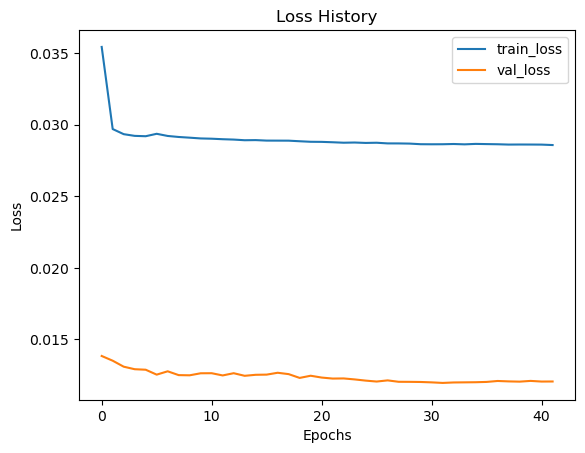

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

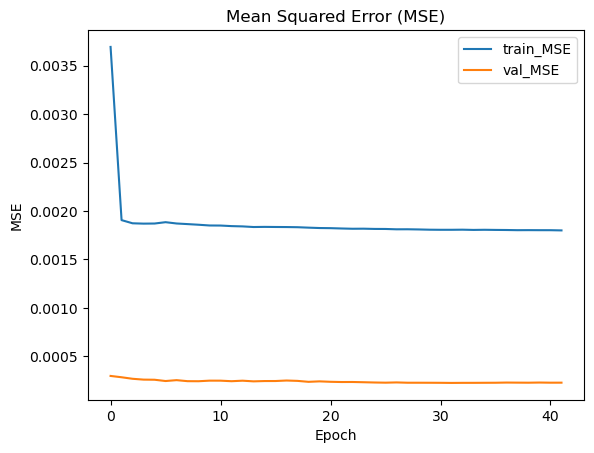

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

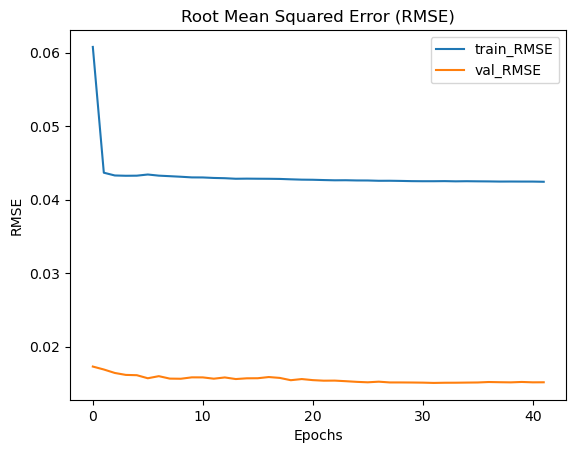

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

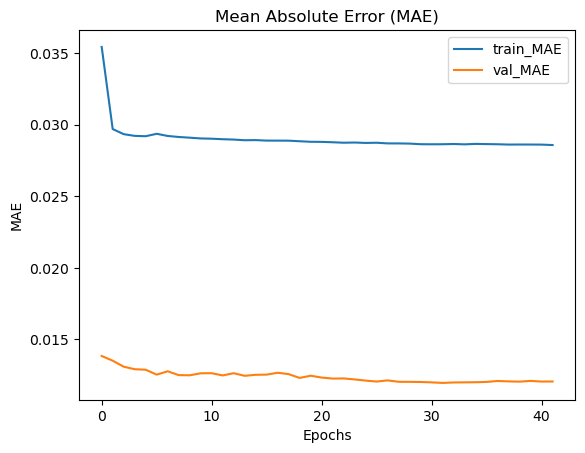

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

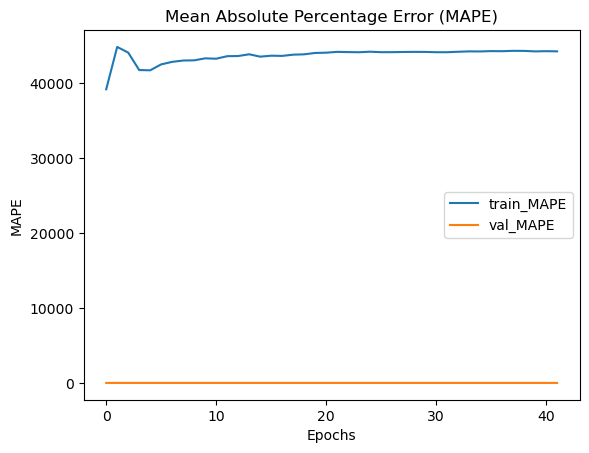

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 21:46:05.653334: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7558, 40, 4)
Labels Shape: (7558, 5, 1)
Prediction Shape: (7558, 5, 10)


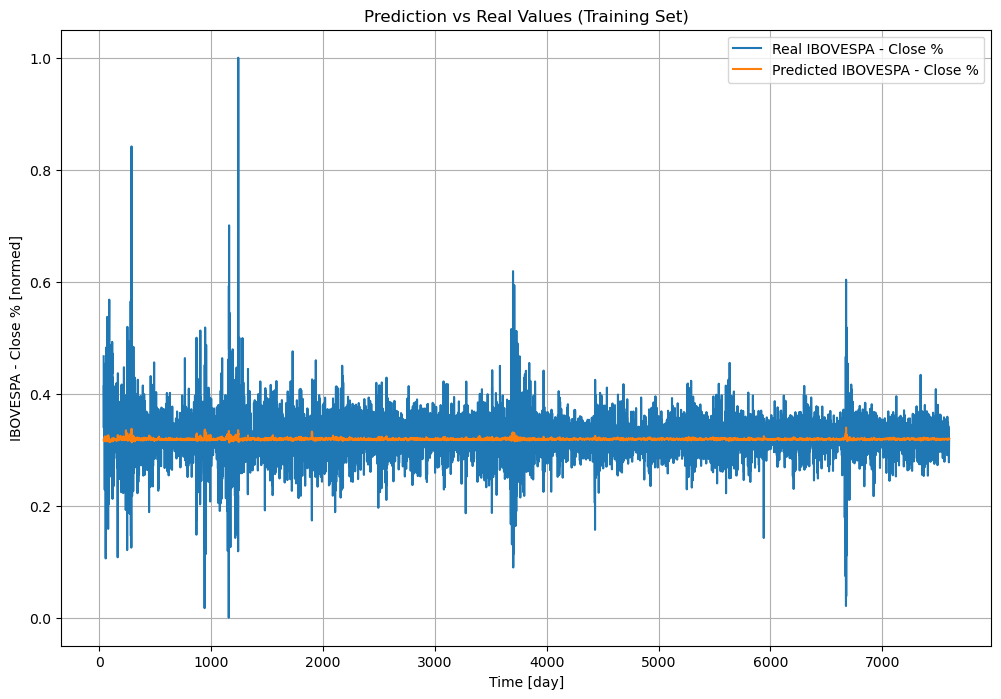

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 4)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


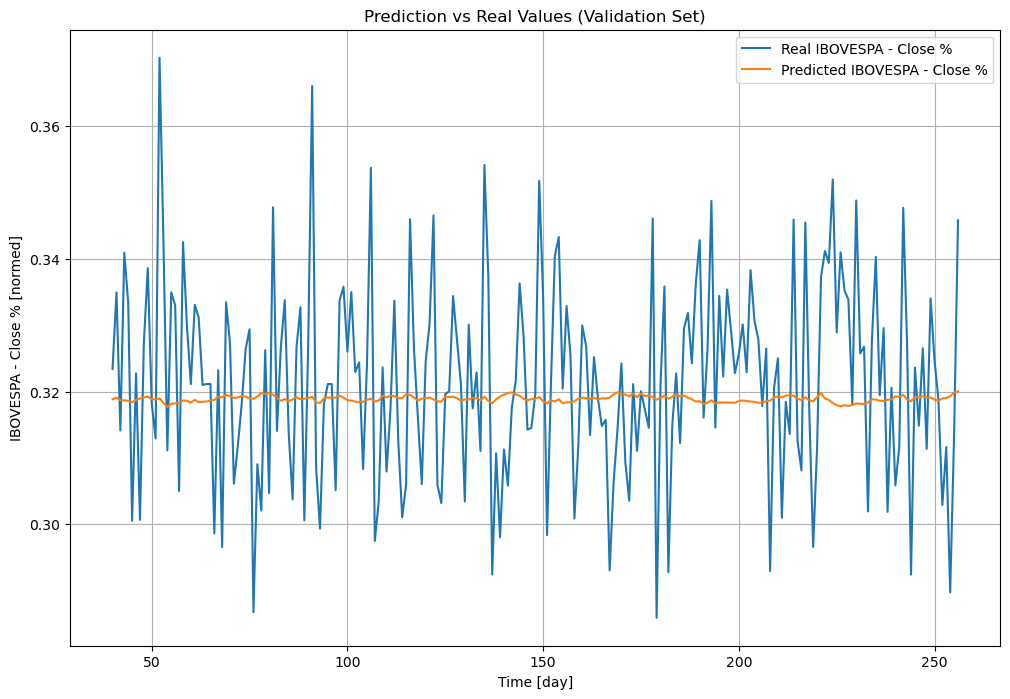

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 4)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


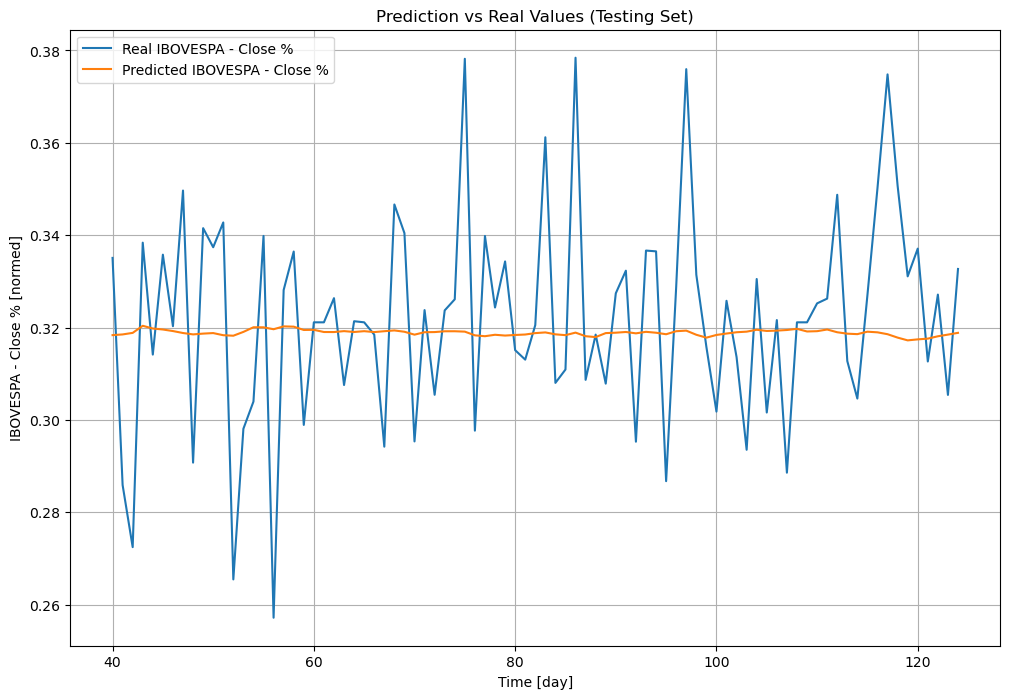

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

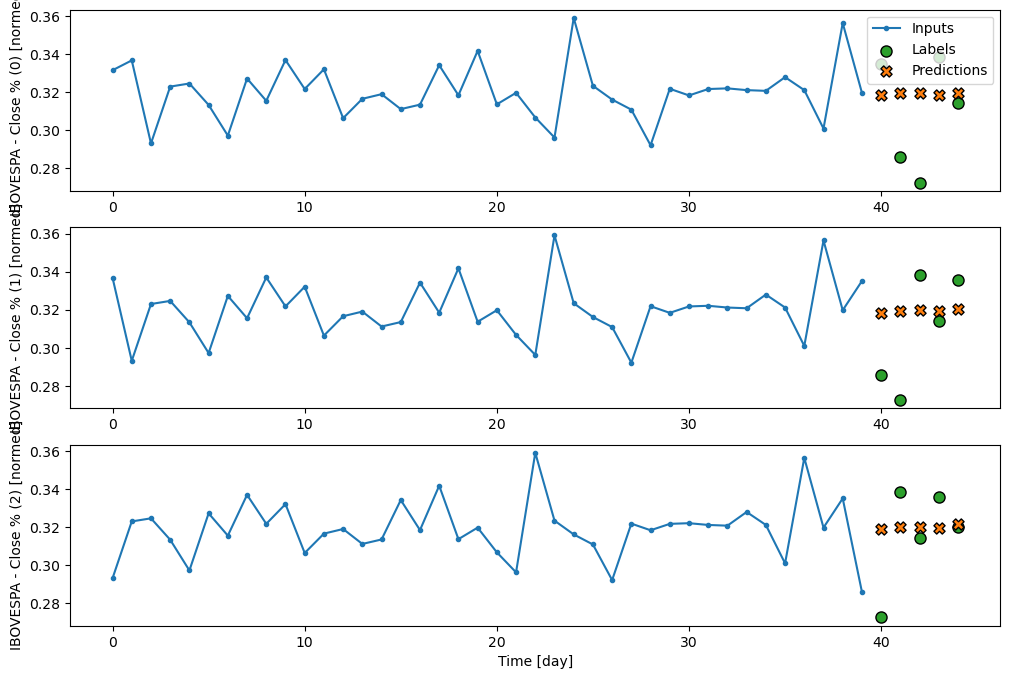

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:3m:36s:96ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


array([[[0.3183639 , 0.3183639 , 0.3183639 , ..., 0.3183639 ,
         0.3183639 , 0.3183639 ],
        [0.31953165, 0.31953165, 0.31953165, ..., 0.31953165,
         0.31953165, 0.31953165],
        [0.31939456, 0.31939456, 0.31939456, ..., 0.31939456,
         0.31939456, 0.31939456],
        [0.31867138, 0.31867138, 0.31867138, ..., 0.31867138,
         0.31867138, 0.31867138],
        [0.3198257 , 0.3198257 , 0.3198257 , ..., 0.3198257 ,
         0.3205346 , 0.3205346 ]],

       [[0.31851667, 0.31851667, 0.31851667, ..., 0.31851667,
         0.31851667, 0.31851667],
        [0.31957713, 0.31957713, 0.31957713, ..., 0.31957713,
         0.31957713, 0.31957713],
        [0.31967467, 0.31967467, 0.31967467, ..., 0.31967467,
         0.31967467, 0.31967467],
        [0.31905785, 0.31905785, 0.31905785, ..., 0.31905785,
         0.31905785, 0.31905785],
        [0.3204719 , 0.3204719 , 0.3204719 , ..., 0.3204719 ,
         0.321178  , 0.321178  ]],

       [[0.31885353, 0.31885353, 0.3

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')